## Importación de Librerías ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, auc
import warnings
warnings.filterwarnings('ignore')

# Lectura de los datos y solución de valores nulos #

In [2]:
df = pd.read_csv('files/weatherAUS.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145407  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145408  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145409  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145410  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145411  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
145407       NaN           E           31.0        ESE  ...        27.0   
145408       NaN           E           31.0         SE  ...        24.0   
145409       NaN         NNW           22.0         SE  ...        21.0   
145410       NaN           N           37.0         SE  ...        24.0   
145411       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145407       1024.7       1021.2       NaN       NaN      9.4     20.9   
145408       1024.6       1020.3       NaN       NaN     10.1     22.4   
145409       1023.5       1019.1       NaN       NaN     10.9     24.5   
145410       1021.0       1016.8       NaN       NaN     12.5     26.1   
145411       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  RainfallTomorrow  
0              No            No               0.0  
1              No            No               0.0  
2              No            No               0.0  
3              No            No               1.0  
4              No            No               0.2  
...           ...           ...               ...  
145407         No            No               0.0  
145408         No            No               0.0  
145409         No            No               0.0  
145410         No            No               0.0  
145411         No            No               0.0  

[145412 rows x 24 columns]

In [3]:
vacios_original=df.isna().sum()
vacios_original

Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

## Clustering ##

Para solventar el problema de los datos vacíos decimos agrupar las ciudades en distintos clusters y completar aquellos datos vacíos con datos del mismo cluster para la misma fecha.

  File "C:\Users\guido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


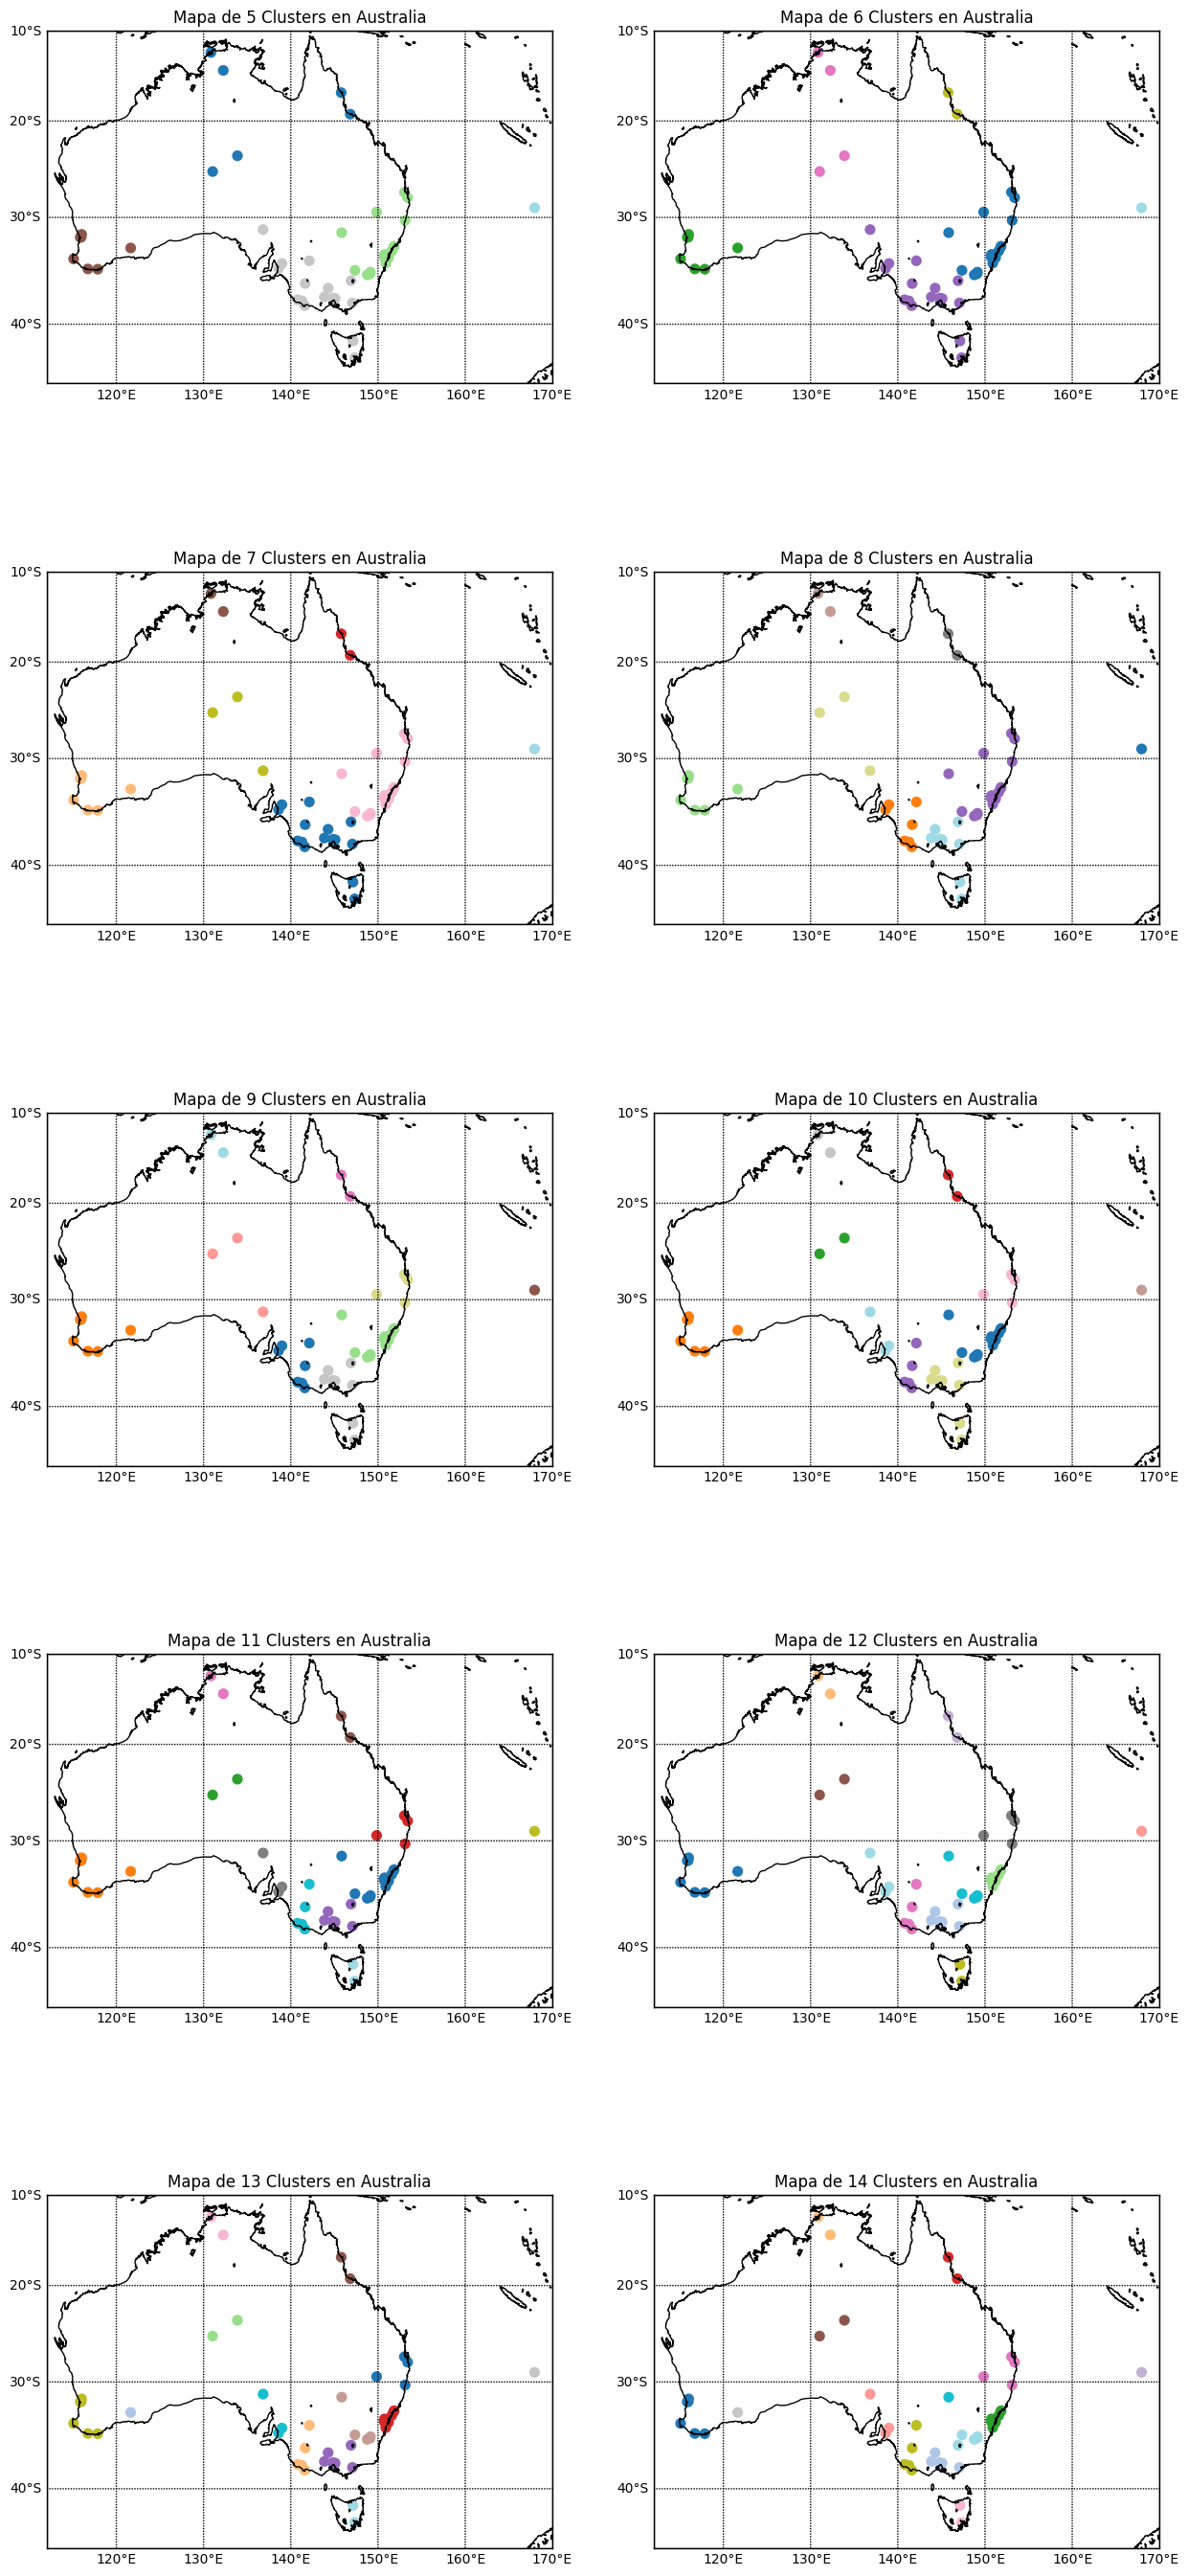

In [4]:
cities=df['Location'].unique().copy()
cities_coord = {'Adelaide': (-34.9285, 138.6007),
                'Albany': (-35.0031, 117.8657),
                'Albury': (-36.0737, 146.9135),
                'AliceSprings': (-23.6980, 133.8807),
                'BadgerysCreek': (-33.8813, 150.7400),
                'Ballarat': (-37.5622, 143.8503),
                'Bendigo': (-36.7570, 144.2794),
                'Brisbane': (-27.4698, 153.0251),
                'Cairns': (-16.9186, 145.7781),
                'Canberra': (-35.2809, 149.1300),
                'Cobar': (-31.4983, 145.8344),
                'CoffsHarbour': (-30.2963, 153.1131),
                'Dartmoor': (-37.9223, 141.2760),
                'Darwin': (-12.4634, 130.8456),
                'GoldCoast': (-28.0167, 153.4000),
                'Hobart': (-42.8821, 147.3272),
                'Katherine': (-14.4644, 132.2630),
                'Launceston': (-41.4545, 147.1317),
                'Melbourne': (-37.8136, 144.9631),
                'MelbourneAirport': (-37.6690, 144.8410),
                'Mildura': (-34.2083, 142.1270),
                'Moree': (-29.4638, 149.8413),
                'MountGambier': (-37.8241, 140.7798),
                'MountGinini': (-35.5294, 148.7720),
                'Newcastle': (-32.9283, 151.7817),
                'Nhil': (-36.3328, 141.6503),
                'NorahHead': (-33.2833, 151.5667),
                'NorfolkIsland': (-29.0408, 167.9547),
                'Nuriootpa': (-34.4667, 138.9833),
                'PearceRAAF': (-31.6675, 116.0158),
                'Penrith': (-33.7581, 150.6950),
                'Perth': (-31.9522, 115.8589),
                'PerthAirport': (-31.9405, 115.9660),
                'Portland': (-38.3511, 141.6056),
                'Richmond': (-33.6000, 150.7500),
                'Sale': (-38.1063, 147.0674),
                'SalmonGums': (-32.9819, 121.6431),
                'Sydney': (-33.8688, 151.2093),
                'SydneyAirport': (-33.9461, 151.1772),
                'Townsville': (-19.2583, 146.8169),
                'Tuggeranong': (-35.4244, 149.0887),
                'Uluru': (-25.3444, 131.0369),
                'WaggaWagga': (-35.1082, 147.3598),
                'Walpole': (-34.9772, 116.7317),
                'Watsonia': (-37.7114, 145.0831),
                'Williamtown': (-32.8150, 151.8428),
                'Witchcliffe': (-34.0264, 115.1000),
                'Wollongong': (-34.4241, 150.8931),
                'Woomera': (-31.1997, 136.8256)}

cities_coord = pd.DataFrame.from_dict(cities_coord, orient='index', columns=['lat', 'lon'])
cities_coord['mean_rain'] = df.groupby('Location')['Rainfall'].mean()
xPos=cities_coord[['lat','lon','mean_rain']].copy()
Nc= range(1, 20)
kmeans= [KMeans(n_clusters=i, n_init=10) for i in Nc]
score = [kmeans[i].fit(xPos).score(xPos) for i in range(len(kmeans))]
# plt.plot(Nc,score)
# plt.xlabel('NumberofClusters')
# plt.ylabel('Score')
# plt.title('ElbowCurve')
# plt.show()

num_clusters = range(5, 15)
num_rows = len(num_clusters) // 2 + len(num_clusters) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 7))
fig.subplots_adjust(hspace=0.3)

for i, num_cluster in enumerate(num_clusters):
    # Elegir el número óptimo de clusters
    kmeans = KMeans(n_clusters=num_cluster, n_init=10).fit(xPos)
    centroids = kmeans.cluster_centers_

    # Asignar cada punto a su respectivo cluster
    xPos['cluster'] = kmeans.predict(xPos)
    labels = np.unique(xPos['cluster'])
    palette = sns.color_palette("hot", len(labels))
    xPos['cluster'] = xPos['cluster'].astype('category')

    # Calcular la fila y la columna actual
    row = i // 2
    col = i % 2

    # Crear un mapa de Australia para el subplot actual
    ax = axes[row, col]
    m = Basemap(
        projection='merc',
        llcrnrlat=-45, urcrnrlat=-10,
        llcrnrlon=112, urcrnrlon=170,
        resolution='i',
        ax=ax
    )
    m.drawmapboundary()
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1])

    # Crear un gráfico de dispersión centrado en Australia
    scatter = m.scatter(
        xPos['lon'], xPos['lat'],
        c=xPos['cluster'], cmap='tab20', s=50,
        latlon=True
    )

    # Configurar título y leyenda para el subplot
    ax.set_title(f'Mapa de {num_cluster} Clusters en Australia')
    #plt.colorbar(scatter, ax=ax, label='Cluster')

# Eliminar subplots vacíos si es necesario
if len(num_clusters) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.show()

Decidimos utilizar 13 clusters debido a que consideramos es la cantidad que mejor se ajusta a los datos sin hacer overfitting.

In [5]:
# Elegir el número óptimo de clusters
kmeans = KMeans(n_clusters=13, n_init=10).fit(xPos)
centroids = kmeans.cluster_centers_

# Asignar cada punto a su respectivo cluster
xPos['cluster'] = kmeans.predict(xPos)
labels = np.unique(xPos['cluster'])
palette = sns.color_palette("hot", len(labels))
xPos['cluster'] = xPos['cluster'].astype('category')

df['Cluster']=df['Location'].map(xPos['cluster'])
df.to_csv('files/weatherAUS_cluster.csv', index=False)

## Corrigiendo datos vacíos ##

Dado que estamos hablando de variables climáticas y se puede considerar que estan no presentan grandes variaciones para regiones cercanas, al clusterizar las ciudades podemos estimar aquellos datos vacíos como la media de los datos de las ciudades del mismo cluster para la misma fecha.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Date              145412 non-null  object  
 1   Location          145412 non-null  object  
 2   MinTemp           143928 non-null  float64 
 3   MaxTemp           144159 non-null  float64 
 4   Rainfall          142152 non-null  float64 
 5   Evaporation       82658 non-null   float64 
 6   Sunshine          75616 non-null   float64 
 7   WindGustDir       135096 non-null  object  
 8   WindGustSpeed     135159 non-null  float64 
 9   WindDir9am        134850 non-null  object  
 10  WindDir3pm        141186 non-null  object  
 11  WindSpeed9am      143645 non-null  float64 
 12  WindSpeed3pm      142351 non-null  float64 
 13  Humidity9am       142759 non-null  float64 
 14  Humidity3pm       140907 non-null  float64 
 15  Pressure9am       130351 non-null  float64 
 16  Pr

In [7]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
non_numeric_columns = df.select_dtypes(include=[object]).columns

In [8]:
numeric_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupa por 'Cluster' y 'Date' y llena los valores nulos con la media del grupo.
grouped = df.groupby(['Cluster', 'Date'])
df_filled = grouped[numeric_columns].transform(lambda x: x.fillna(x.mean()))

df[numeric_columns] = df_filled

# Función para llenar los valores nulos con la moda
def fill_with_mode(x):
    mode_value = x.mode()
    if len(mode_value) > 0:
        return x.fillna(mode_value.iloc[0])
    else:
        return x

# Agrupar por 'Cluster' y 'Date' y llenar los valores nulos con la moda del grupo
df_non_numeric = df.groupby(['Cluster', 'Date'])[non_numeric_columns].transform(fill_with_mode)

# Asignar los valores llenos al DataFrame original
df[non_numeric_columns] = df_non_numeric

In [10]:
vacios_transformado=df.isna().sum()
comparison_df = pd.DataFrame({'vacios_antes': vacios_original, 'vacios_despues': vacios_transformado})
total_datos = len(df)
comparison_df['porcentaje recuperado'] = 100 * (1 - comparison_df['vacios_despues'] / comparison_df['vacios_antes'])
comparison_df['porcentaje recuperado'] = comparison_df['porcentaje recuperado'].apply(lambda x: f'{x:.2f}%')
comparison_df['porcentaje_completo'] = 100 * (1 - comparison_df['vacios_despues'] / total_datos)
comparison_df['porcentaje_completo'] = comparison_df['porcentaje_completo'].apply(lambda x: f'{x:.2f}%')


# Mostrar el DataFrame con la comparación
comparison_df

vacios_antes  vacios_despues porcentaje recuperado  \
Cloud3pm               59336.0            8017                86.49%   
Cloud9am               55870.0            6899                87.65%   
Cluster                    NaN               0                  nan%   
Date                       0.0               0                  nan%   
Evaporation            62754.0            4973                92.08%   
Humidity3pm             4505.0              45                99.00%   
Humidity9am             2653.0              45                98.30%   
Location                   0.0               0                  nan%   
MaxTemp                 1253.0              44                96.49%   
MinTemp                 1484.0              44                97.04%   
Pressure3pm            15024.0            3006                79.99%   
Pressure9am            15061.0            3011                80.01%   
RainToday               3260.0             112                96.56%   
RainTomorrow            3259.0             112                96.56%   
Rainfall                3260.0             112                96.56%   
RainfallTomorrow        3259.0             112                96.56%   
Sunshine               69796.0            8487                87.84%   
Temp3pm                 3607.0              42                98.84%   
Temp9am                 1766.0              42                97.62%   
WindDir3pm              4226.0              93                97.80%   
WindDir9am             10562.0             338                96.80%   
WindGustDir            10316.0             512                95.04%   
WindGustSpeed          10253.0             510                95.03%   
WindSpeed3pm            3061.0              79                97.42%   
WindSpeed9am            1767.0              89                94.96%   

                 porcentaje_completo  
Cloud3pm                      94.49%  
Cloud9am                      95.26%  
Cluster                      100.00%  
Date                         100.00%  
Evaporation                   96.58%  
Humidity3pm                   99.97%  
Humidity9am                   99.97%  
Location                     100.00%  
MaxTemp                       99.97%  
MinTemp                       99.97%  
Pressure3pm                   97.93%  
Pressure9am                   97.93%  
RainToday                     99.92%  
RainTomorrow                  99.92%  
Rainfall                      99.92%  
RainfallTomorrow              99.92%  
Sunshine                      94.16%  
Temp3pm                       99.97%  
Temp9am                       99.97%  
WindDir3pm                    99.94%  
WindDir9am                    99.77%  
WindGustDir                   99.65%  
WindGustSpeed                 99.65%  
WindSpeed3pm                  99.95%  
WindSpeed9am                  99.94%

Podemos notar que el método fue efectivo, habiendo recuperado grandes cantidades de datos y con registros totales completos que se acercan al 100%. Ahora podríamos considerar eliminar los registros que presenten valores nulos y no deberíamos perder grandes vólumenes de información.

In [11]:
df_sin_nan = df.dropna()
df_sin_nan.to_csv('files/weatherAUS_sin_nan.csv', index=False)
df=df_sin_nan.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132032 entries, 0 to 144987
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              132032 non-null  datetime64[ns]
 1   Location          132032 non-null  object        
 2   MinTemp           132032 non-null  float64       
 3   MaxTemp           132032 non-null  float64       
 4   Rainfall          132032 non-null  float64       
 5   Evaporation       132032 non-null  float64       
 6   Sunshine          132032 non-null  float64       
 7   WindGustDir       132032 non-null  object        
 8   WindGustSpeed     132032 non-null  float64       
 9   WindDir9am        132032 non-null  object        
 10  WindDir3pm        132032 non-null  object        
 11  WindSpeed9am      132032 non-null  float64       
 12  WindSpeed3pm      132032 non-null  float64       
 13  Humidity9am       132032 non-null  float64       
 14  Humidity3

## Unificando Variables relacionadas ##

Existen relaciones intrínsecas entre ciertas variables, para poder hacer predicciones con ellas decidimos unificarlas en otras nuevas. Construimos un vector para aquellas variables que presentaban módulo y dirección, para luego tomar sus componentes como nuevos parámetros. Tomamos la diferencia de presiones también como nueva variable, el mismo procedimiento lo hacemos para la humedad. Para las variables de nubosidad construimos una nueva variable categórica que representara el estado del cielo en ese día.

In [12]:
def vector_coordinates(df, column, dir, speed, threshold=1e-6):
    direcciones = {
        'N': 0,
        'NNE': 22.5,
        'NE': 45,
        'ENE': 67.5,
        'E': 90,
        'ESE': 112.5,
        'SE': 135,
        'SSE': 157.5,
        'S': 180,
        'SSW': 202.5,
        'SW': 225,
        'WSW': 247.5,
        'W': 270,
        'WNW': 292.5,
        'NW': 315,
        'NNW': 337.5
    }
    velocidad = df[speed]
    df[column + 'u'] = -velocidad * np.sin(np.deg2rad(df[dir].map(direcciones)))
    df[column + 'v'] = -velocidad * np.cos(np.deg2rad(df[dir].map(direcciones)))
    
    # Comprobación condicional para valores cercanos a cero
    df[column + 'u'][np.abs(df[column + 'u']) < threshold] = 0
    df[column + 'v'][np.abs(df[column + 'v']) < threshold] = 0
    
    return df

def definir_estado_del_cielo(row):
    if row['Cloud9am'] == 0 and row['Cloud3pm'] == 0:
        return 'Despejado'
    elif row['Cloud9am'] <= 4 and row['Cloud3pm'] <= 4:
        return 'Parcialmente Nublado'
    elif row['Cloud9am'] <= 7 and row['Cloud3pm'] <= 7:
        return 'Nublado'
    else:
        return 'Muy Nublado'

In [13]:
df=vector_coordinates(df,'Wind9am','WindDir9am','WindSpeed9am')
df=vector_coordinates(df,'Wind3pm','WindDir3pm','WindSpeed3pm')
df=vector_coordinates(df,'WindGust','WindGustDir','WindGustSpeed')
df['Pressure_Difference'] = df['Pressure3pm'] - df['Pressure9am']
df['Humidity_Difference'] = df['Humidity3pm'] - df['Humidity9am']
df['Estado_Cielo'] = df.apply(definir_estado_del_cielo, axis=1)
df.drop(['Cloud3pm','Cloud9am','Humidity3pm','Humidity9am','WindSpeed9am','WindSpeed3pm','WindGustSpeed','WindDir9am','WindDir3pm','WindGustDir','Pressure3pm','Pressure9am','Temp3pm','Temp9am'], axis=1, inplace=True)


# Visualización y análisis de datos #

In [14]:
def city_dataframe(df,city):
    df_city = df[df['Location'] == city]
    return df_city

def cluster_dataframe(df,cluster):
    df_cluster = df[df['Cluster'] == cluster]
    return df_cluster

def plot_temperature(df):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 5))
    sns.lineplot(x="Date", y="MaxTemp", data=df, color='red')
    sns.lineplot(x="Date", y="MinTemp", data=df, color='blue')
    plt.xticks(rotation=90)
    plt.xticks(np.arange(0, len(df), 50))
    plt.show()

def plot_variables(df):
    sns.set(style="darkgrid")

    # Obtiene una lista de todas las columnas numéricas del DataFrame
    numeric_columns = df.drop(['Rainfall','RainfallTomorrow'],axis=1).select_dtypes(include=[float, int]).columns

    # Calcula el número de filas y columnas necesarias para el ploteo
    num_rows = (len(numeric_columns) + 1) // 2
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(3 * num_rows, 20 * num_cols))

    # Espacio entre los subplots
    plt.subplots_adjust(wspace=1, hspace=1)

    # Colores distintos para los histogramas
    colors = sns.color_palette("Set2", n_colors=len(numeric_columns))

    # Itera a través de las columnas numéricas y crea un histograma para cada una
    for i, col in enumerate(numeric_columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Selecciona un color diferente para cada histograma
        color = colors[i]

        sns.histplot(data=df, x=col, kde=True, color=color, ax=axs[row, col_idx])

        axs[row, col_idx].set_xlabel(col, fontsize=30)
        axs[row, col_idx].set_ylabel("Count",fontsize=20)

        # Cambia el tamaño de letra de los ejes X y Y
        axs[row, col_idx].tick_params(axis='x', labelsize=20)
        axs[row, col_idx].tick_params(axis='y', labelsize=20)

    # Elimina cualquier subplot no utilizado
    for i in range(len(numeric_columns), num_rows * num_cols):
        row = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axs[row, col_idx])

    # Añade un título general a la figura
    if len(df['Cluster'].unique()) == 1:
        fig.suptitle(f"Histogramas de variales numéricas para el Cluster: {df['Cluster'].iloc[0]}", fontsize=30)
    elif len(df['Location'].unique()) == 1:
        fig.suptitle(f"Histogramas de variales numéricas: {df['Location'].iloc[0]}", fontsize=30)
    else:
        fig.suptitle(f"Histogramas de variales numéricas", fontsize=30)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

def matriz_correlacion(df):
    corr = df.select_dtypes(include=[float, int]).corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(20, 15))

    ax = sns.heatmap(
        corr,
        #mask = mask,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        annot_kws={'size': 15},
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    # Añade un título general a la figura
    if len(df['Cluster'].unique()) == 1:
        ax.set_title(f"Matriz de Correlación para el Cluster: {df['Cluster'].iloc[0]}", fontsize=30)
    elif len(df['Location'].unique()) == 1:
        ax.set_title(f"Matriz de Correlación: {df['Location'].iloc[0]}", fontsize=30)
    else:
        ax.set_title("Matriz de Correlación", fontsize=30)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

def global_boxplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop(['Rainfall','RainfallTomorrow'],axis=1).select_dtypes(include=['number'])
    
    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    
    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title("Boxplots para todas las variables")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    
    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    
    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()

def date_boxplots(df, year, month):
    # Asegúrate de que la columna 'Date' sea de tipo datetime
    df1 = df.drop(['Rainfall','RainfallTomorrow'],axis=1).copy()  # Realizar una copia del DataFrame para evitar el SettingWithCopyWarning

    # Filtrar el DataFrame por el año y el mes específicos
    filtered_df1 = df1[(df1['Date'].dt.year == year) & (df1['Date'].dt.month == month)]
    
    if filtered_df1.empty:
        print("No hay datos para el año y mes especificados.")
        return
    
    # Seleccionar solo las columnas numéricas
    columnas_numericas = filtered_df1.select_dtypes(include=['number'])
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Obtener la cantidad de datos disponibles
    cantidad_datos = len(filtered_df1)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    
    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title(f"Boxplots para {year}/{month}")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    
    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    
    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()


def scatter_plot(df):
    numeric_cols = df.drop(['RainfallTomorrow'], axis=1).select_dtypes(include=['number'])
    num_plots = len(numeric_cols.columns)
    
    # Determina el número de filas y columnas para la matriz
    num_rows = (num_plots + 2) // 3  # Redondea hacia arriba
    num_cols = min(num_plots, 3)

    # Aumenta el tamaño de la figura
    figsize = (20, num_rows * 6)  # Aumenta la altura de la figura
    
    # Crea una figura de Matplotlib con subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, col in enumerate(numeric_cols.columns):
        row = i // num_cols
        col_num = i % num_cols  # Cambia el nombre de la variable para evitar la confusión

        # Selecciona el subplot actual
        ax = axes[row, col_num]

        # Crea el gráfico de dispersión en el subplot
        sns.scatterplot(x=col, y='RainfallTomorrow', data=df, hue='Cluster', ax=ax)
        ax.set_title(col)  # Configura el título del subplot

    # Elimina subplots no utilizados
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col_num = i % num_cols
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()
    
def graficos(df):
    # Imprimir la cantidad de datos disponibles
    print(f"Cantidad de datos disponibles en el DataFrame: {len(df)}")
    plot_variables(df)
    matriz_correlacion(df)
    global_boxplots(df)
    scatter_plot(df)

Usamos la función gráfico para plotear distintos gráficos para el dataframe.

Cantidad de datos disponibles en el DataFrame: 132032


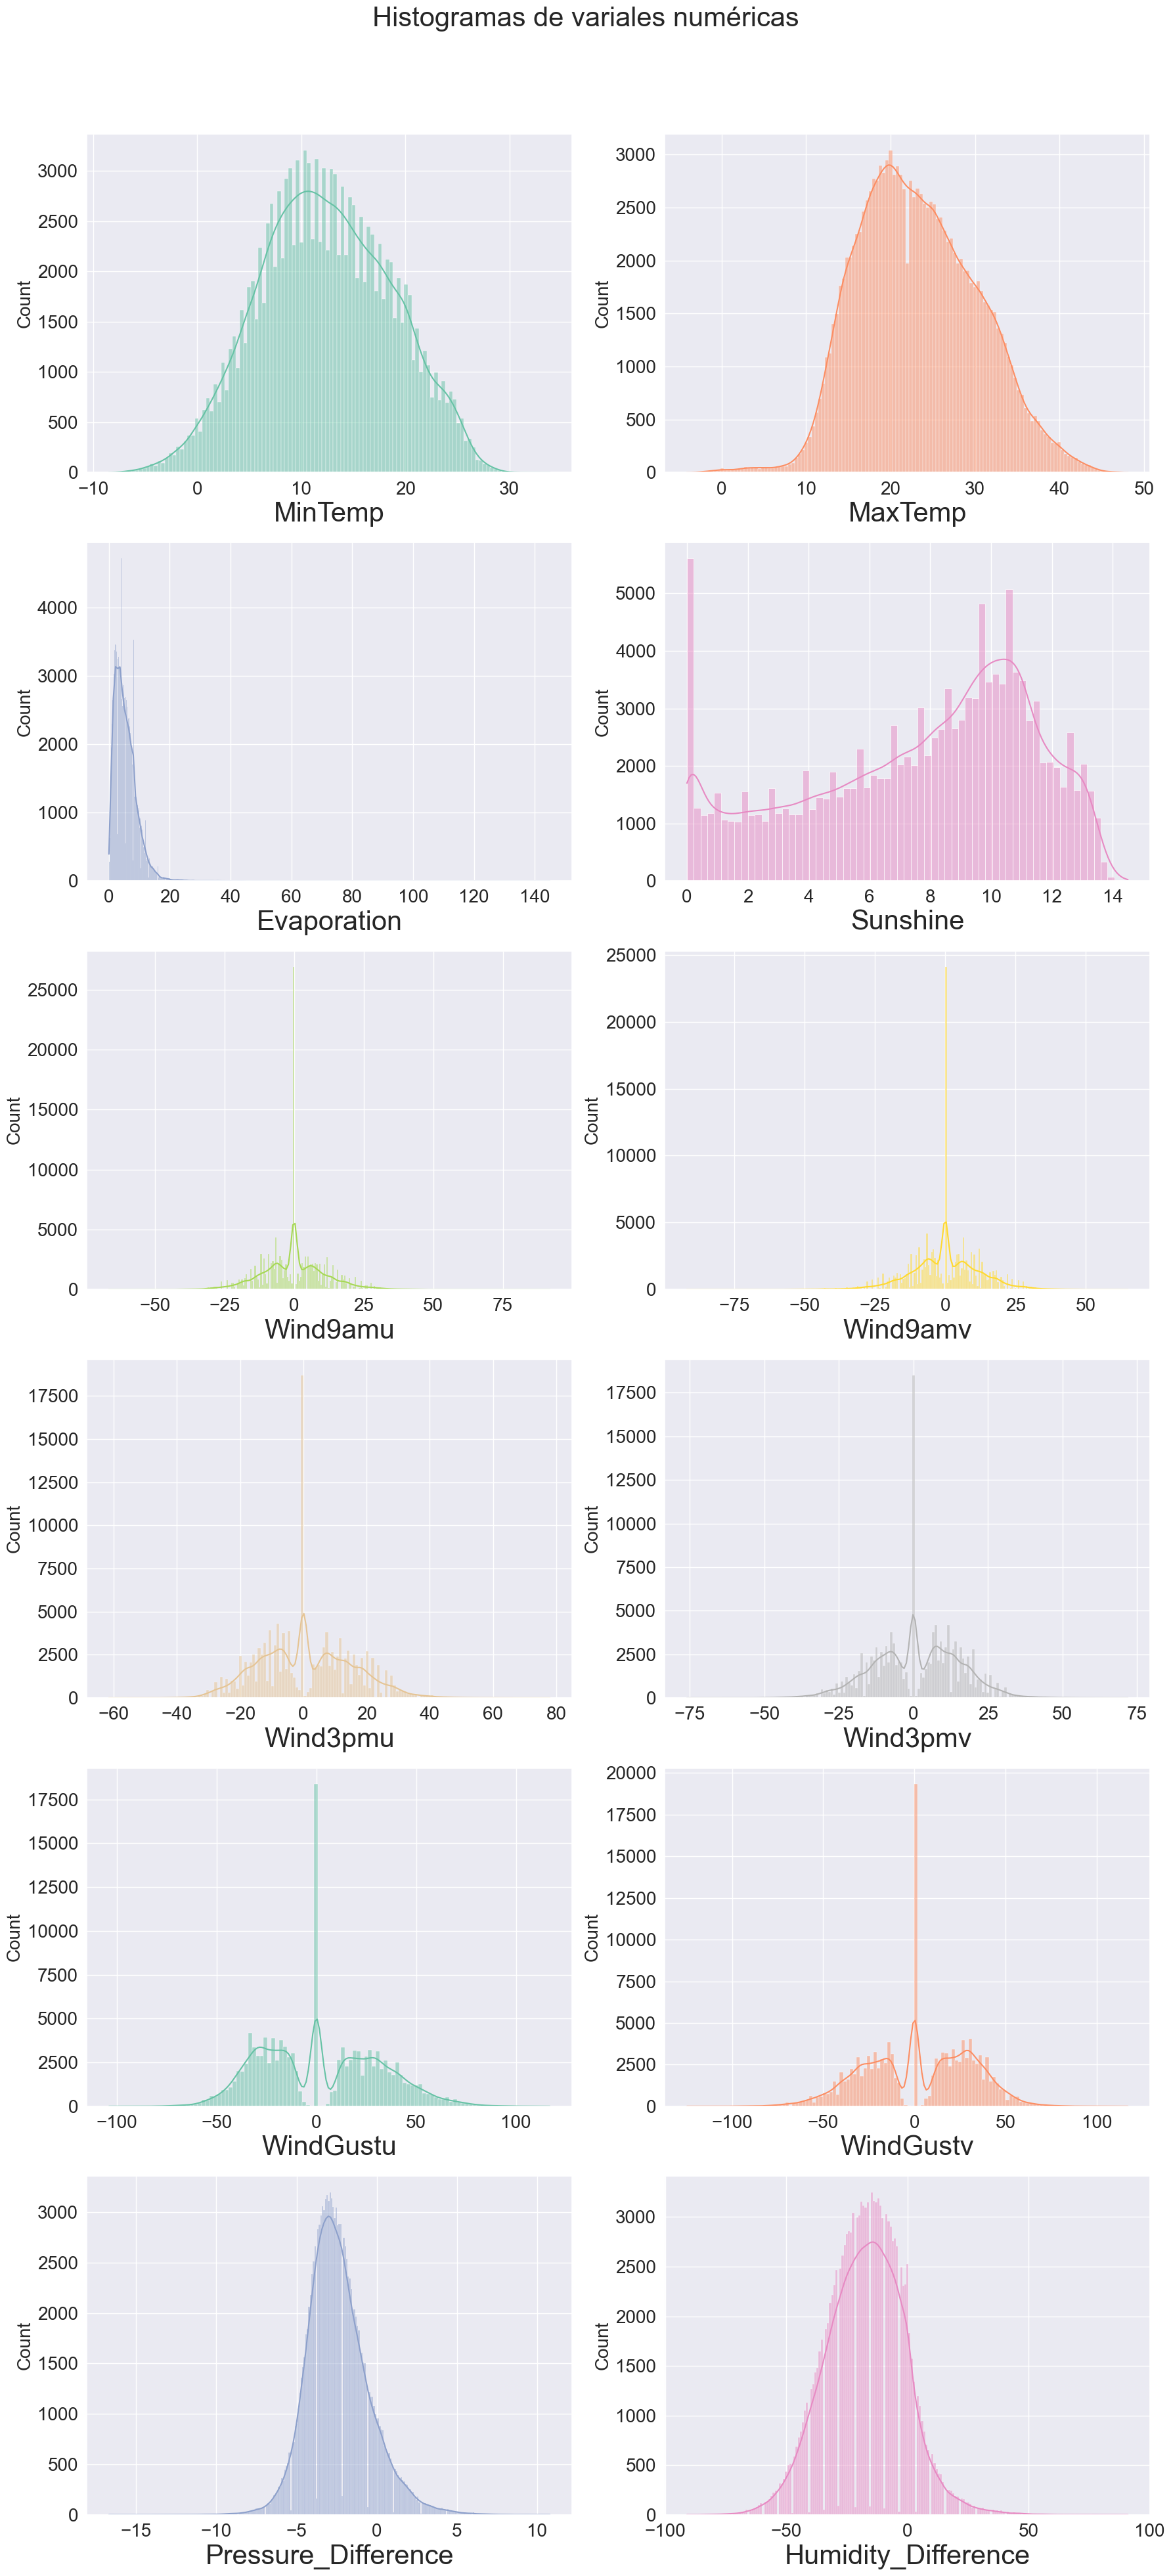

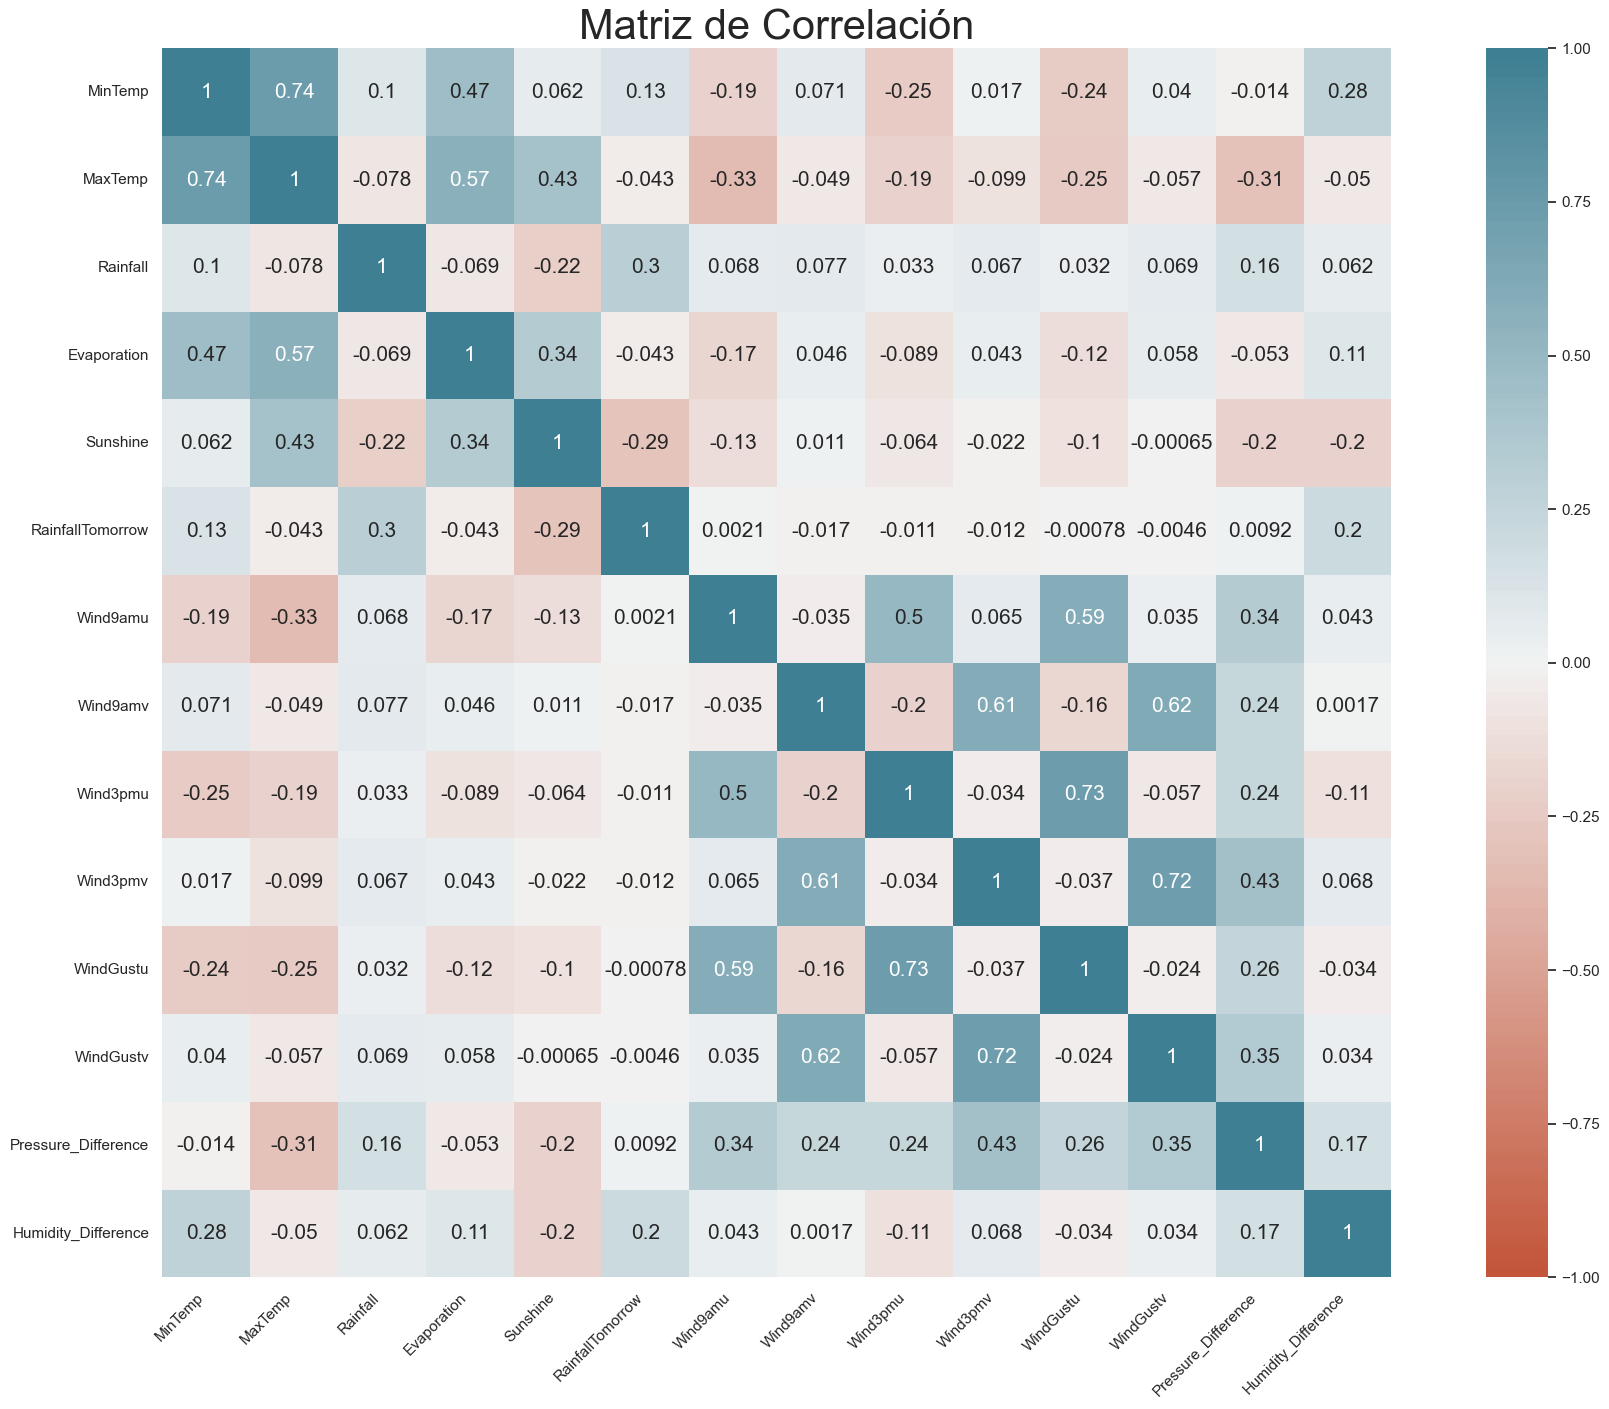

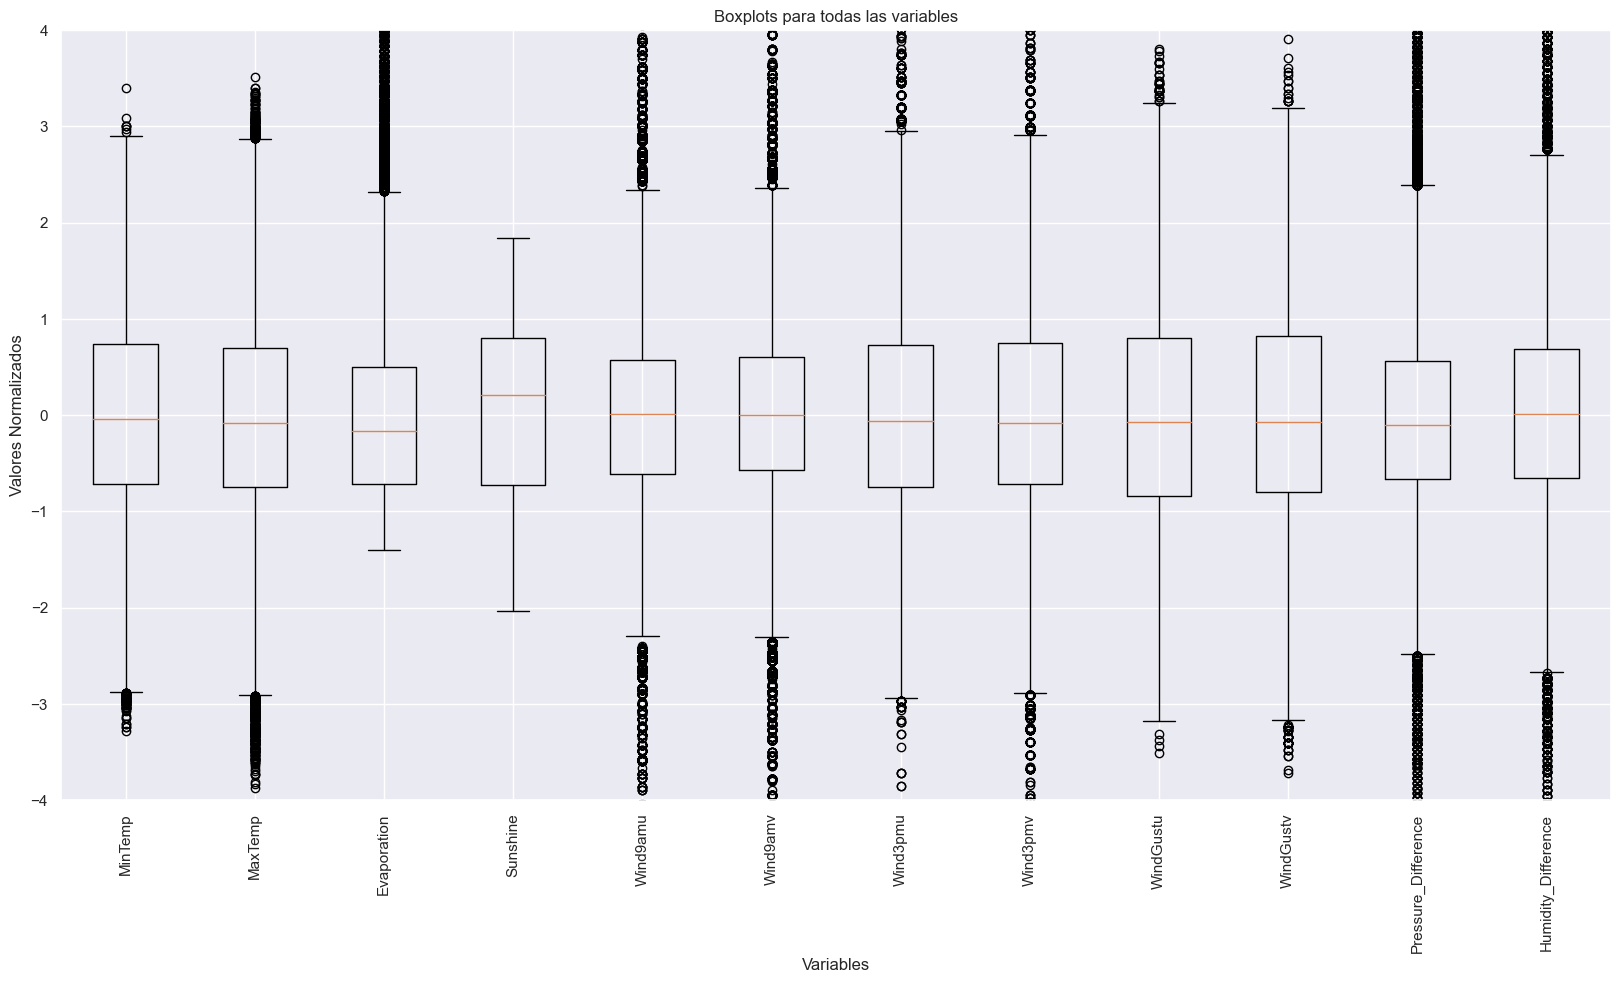

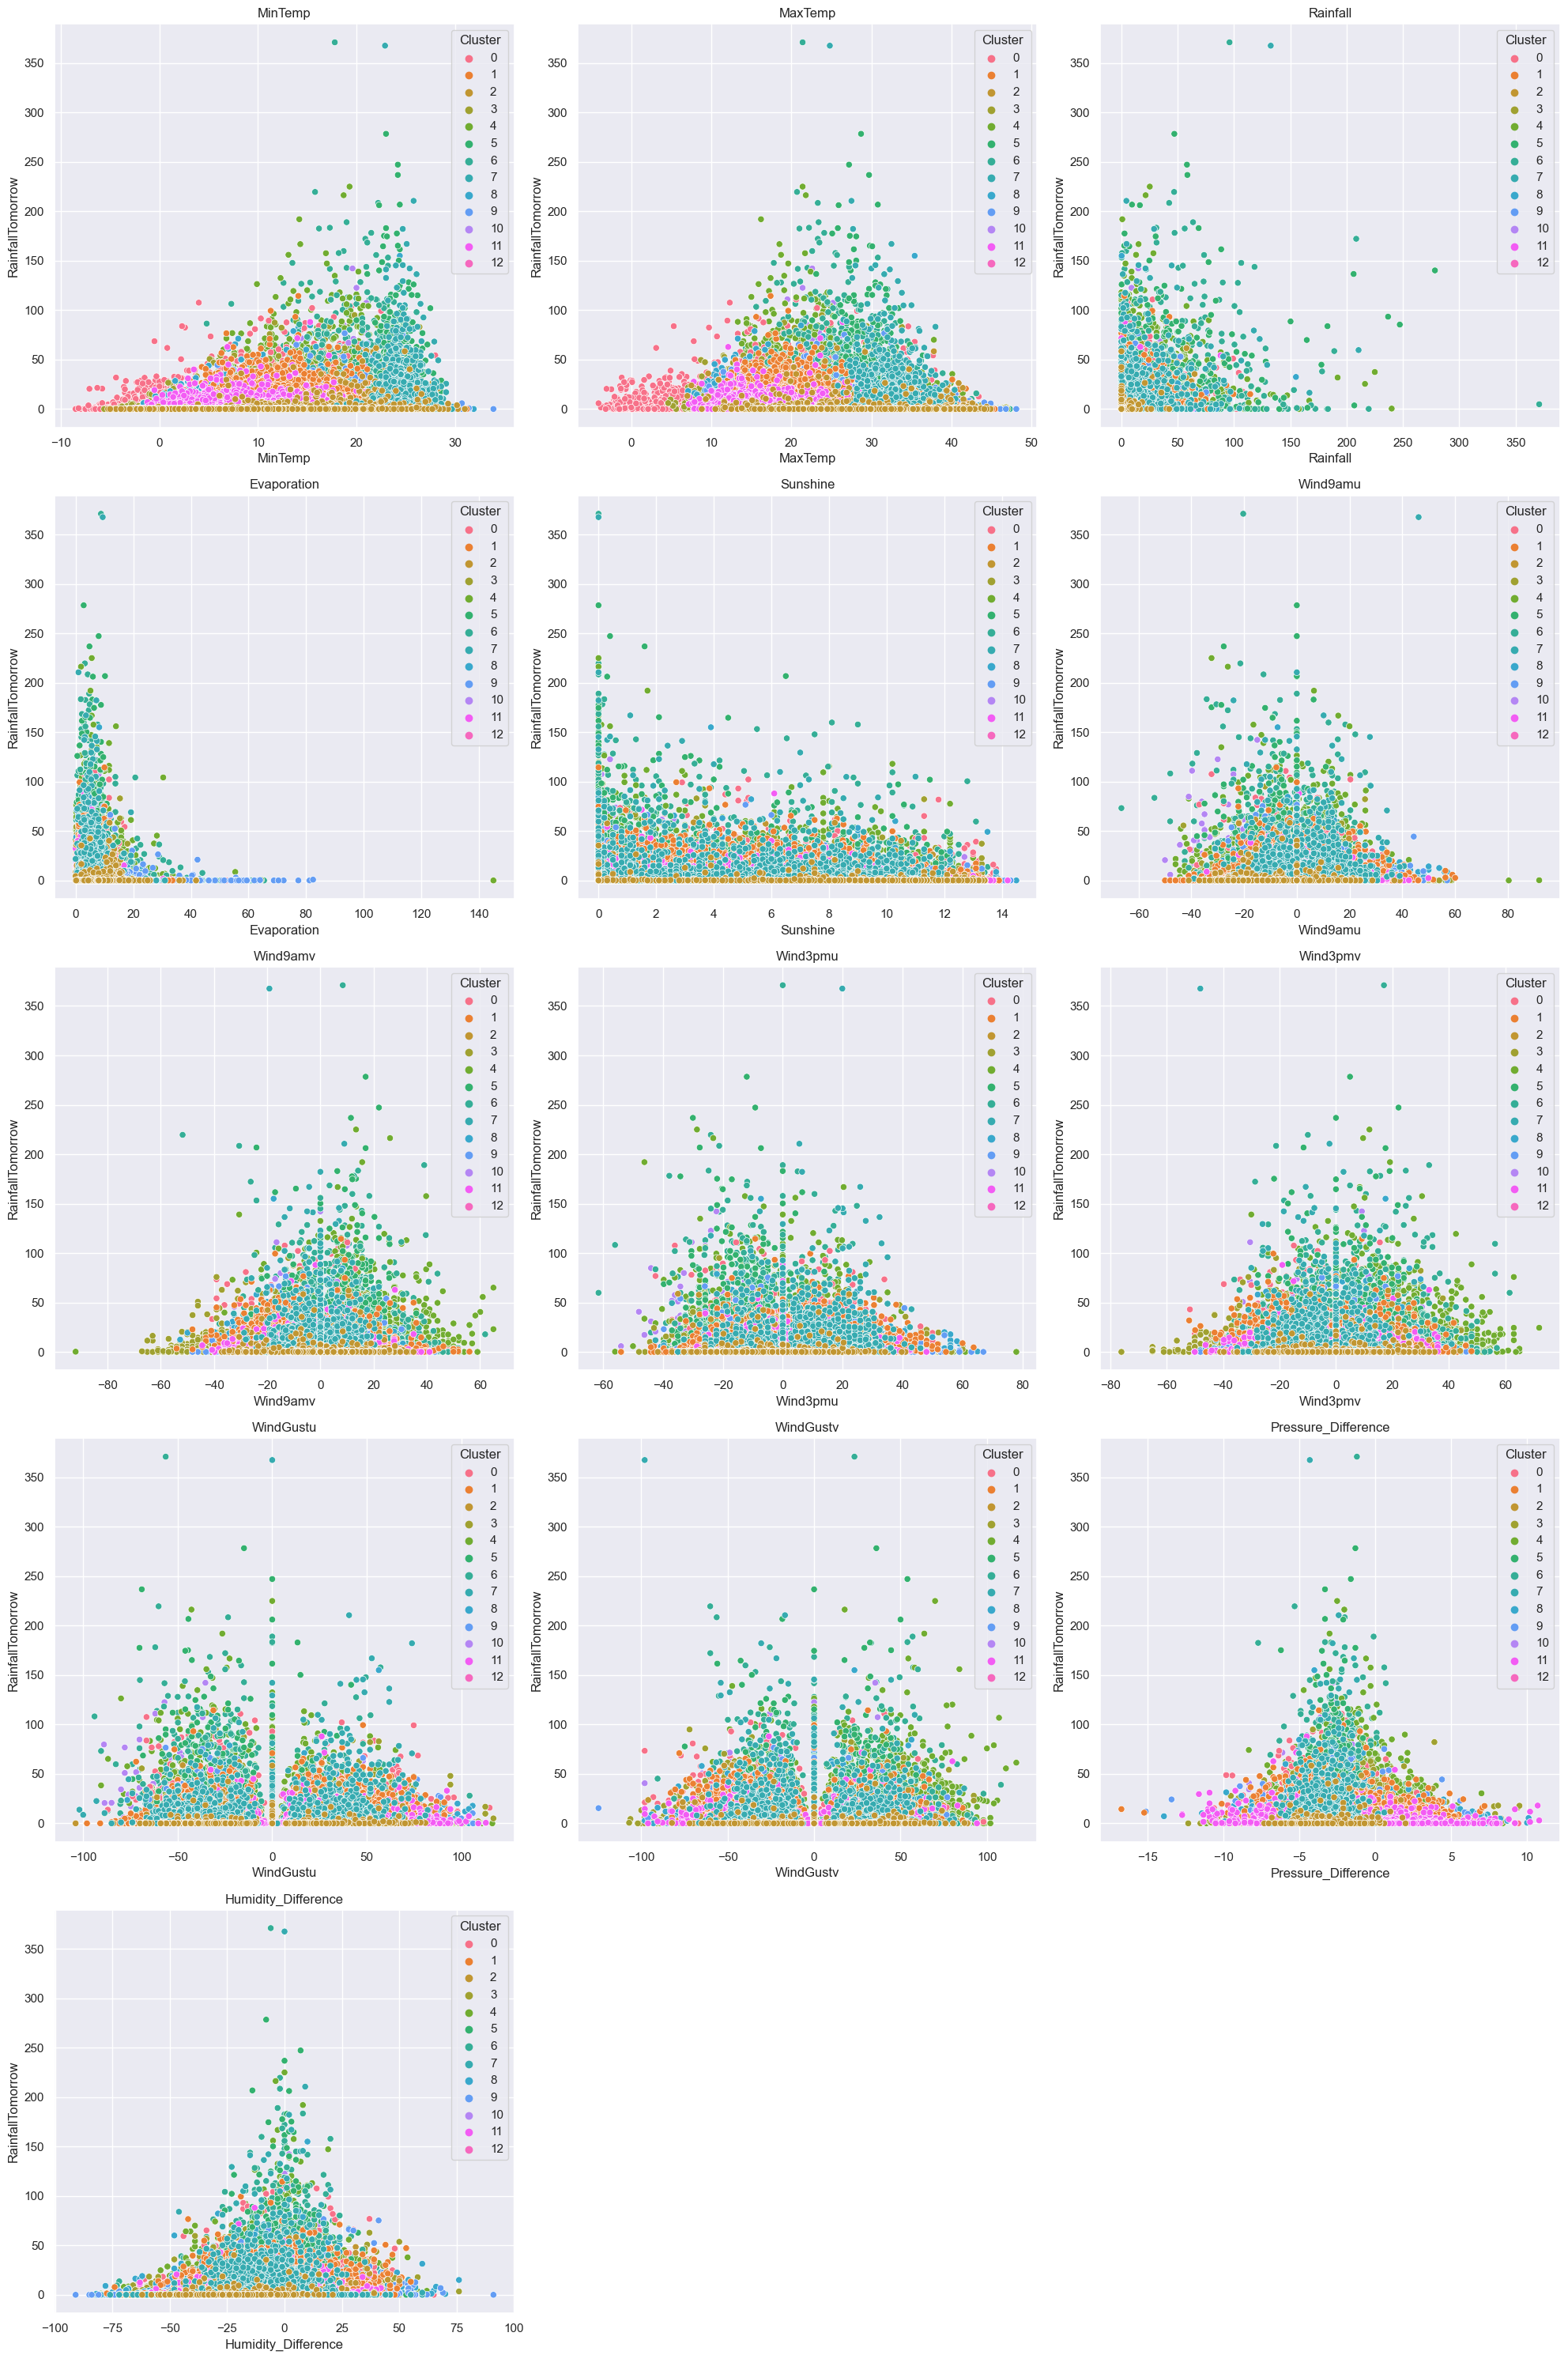

In [15]:
graficos(df)

Podemos usar la misma función para visualizar los datos de un cluster particular.

Cantidad de datos disponibles en el DataFrame: 18244


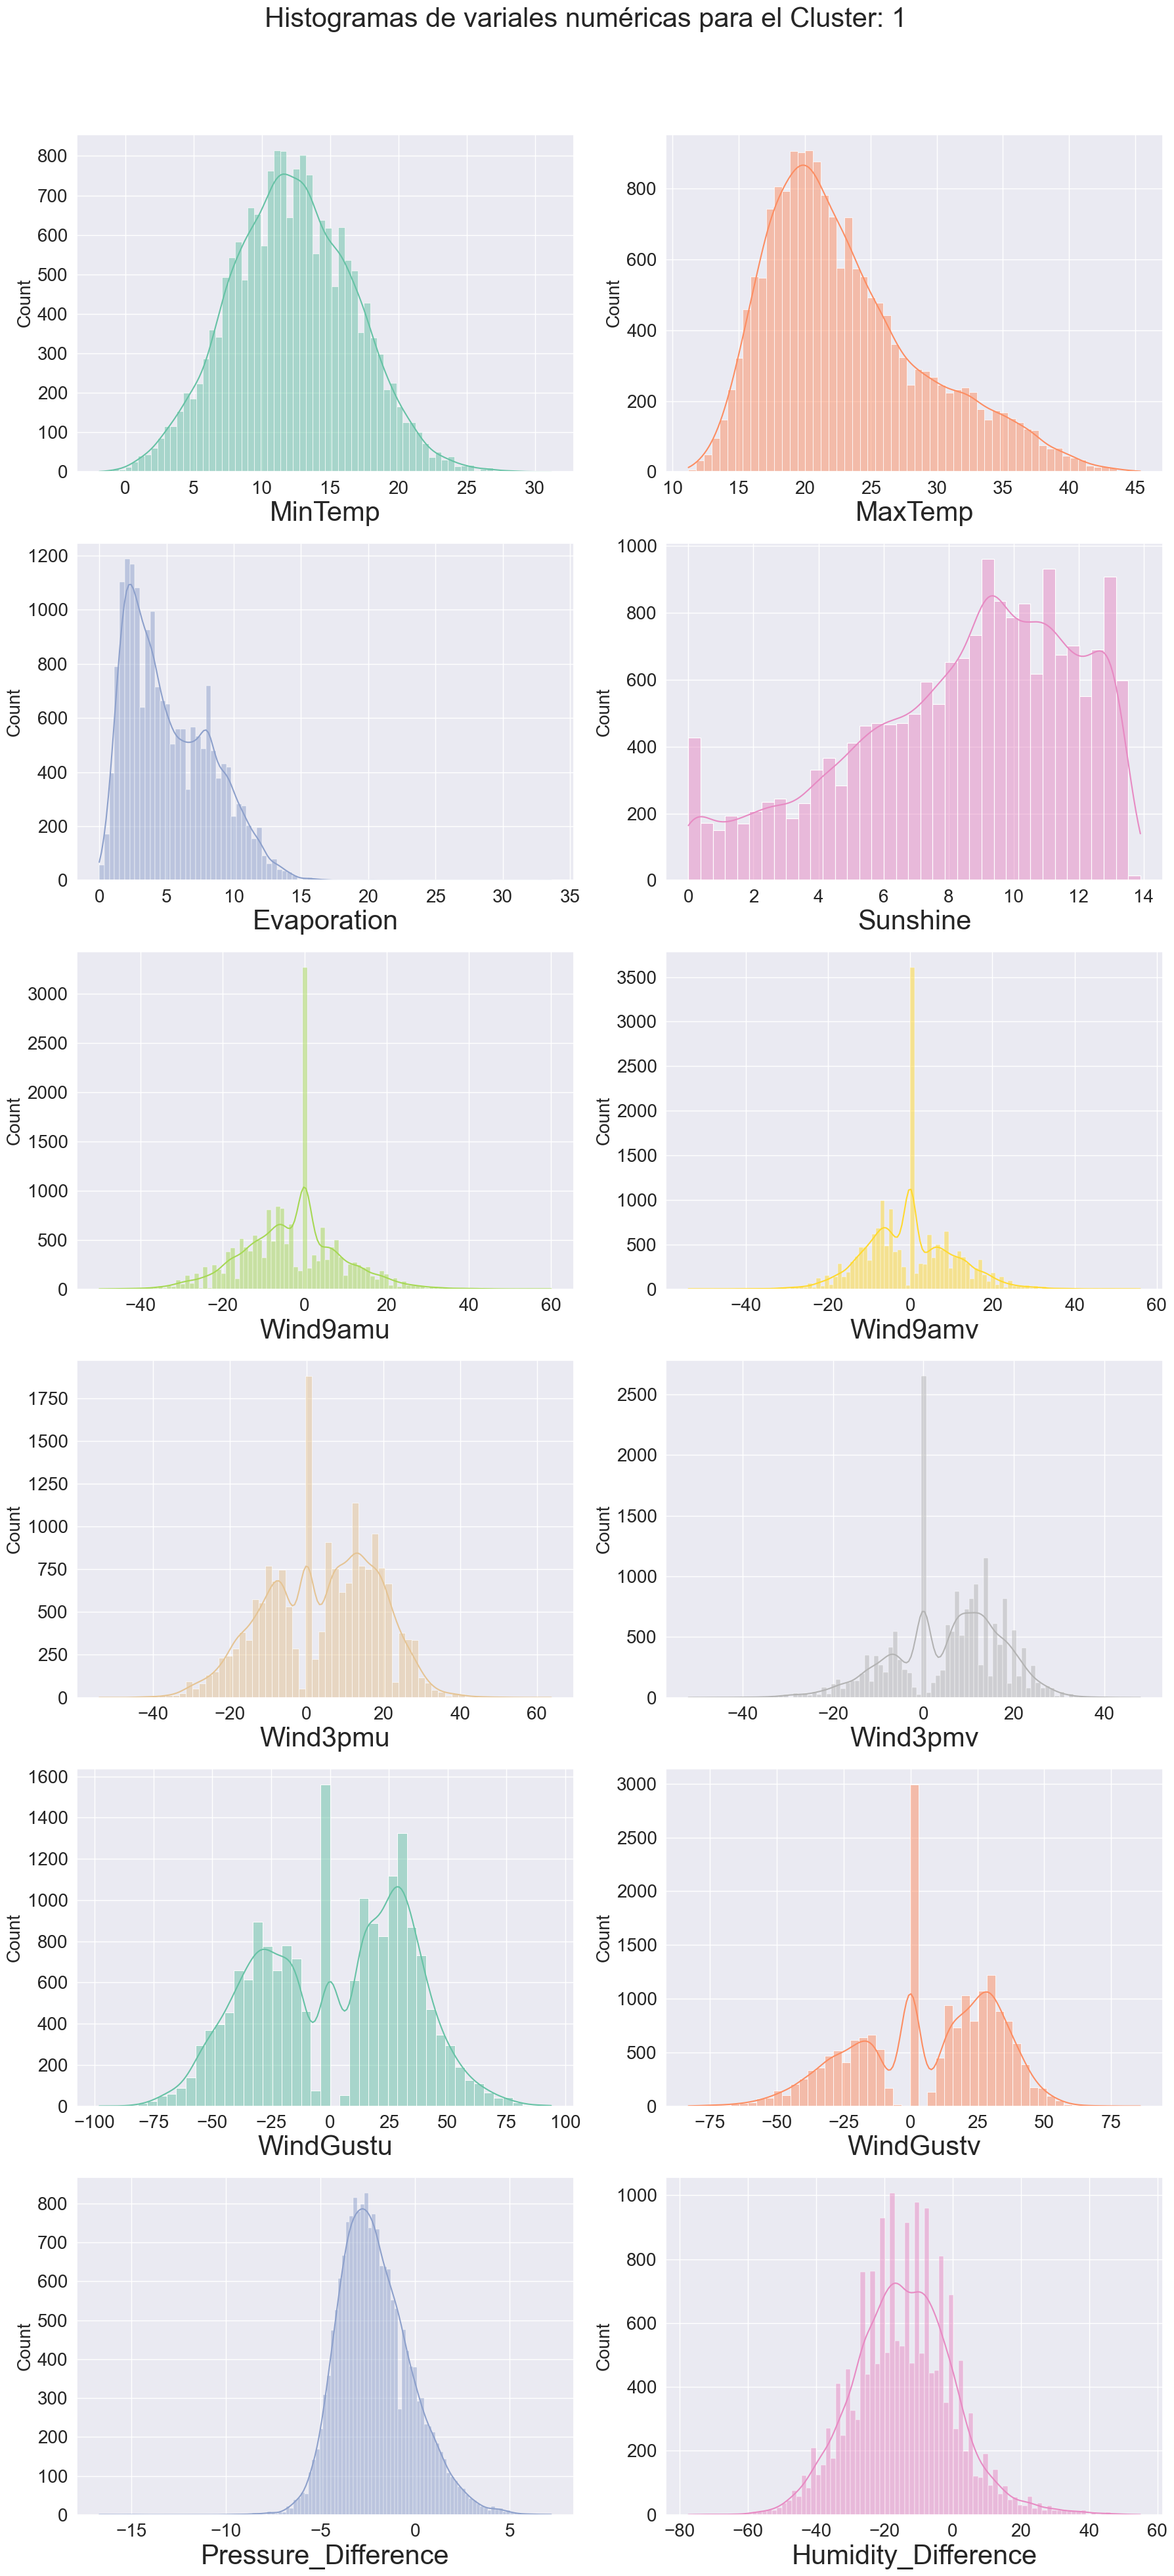

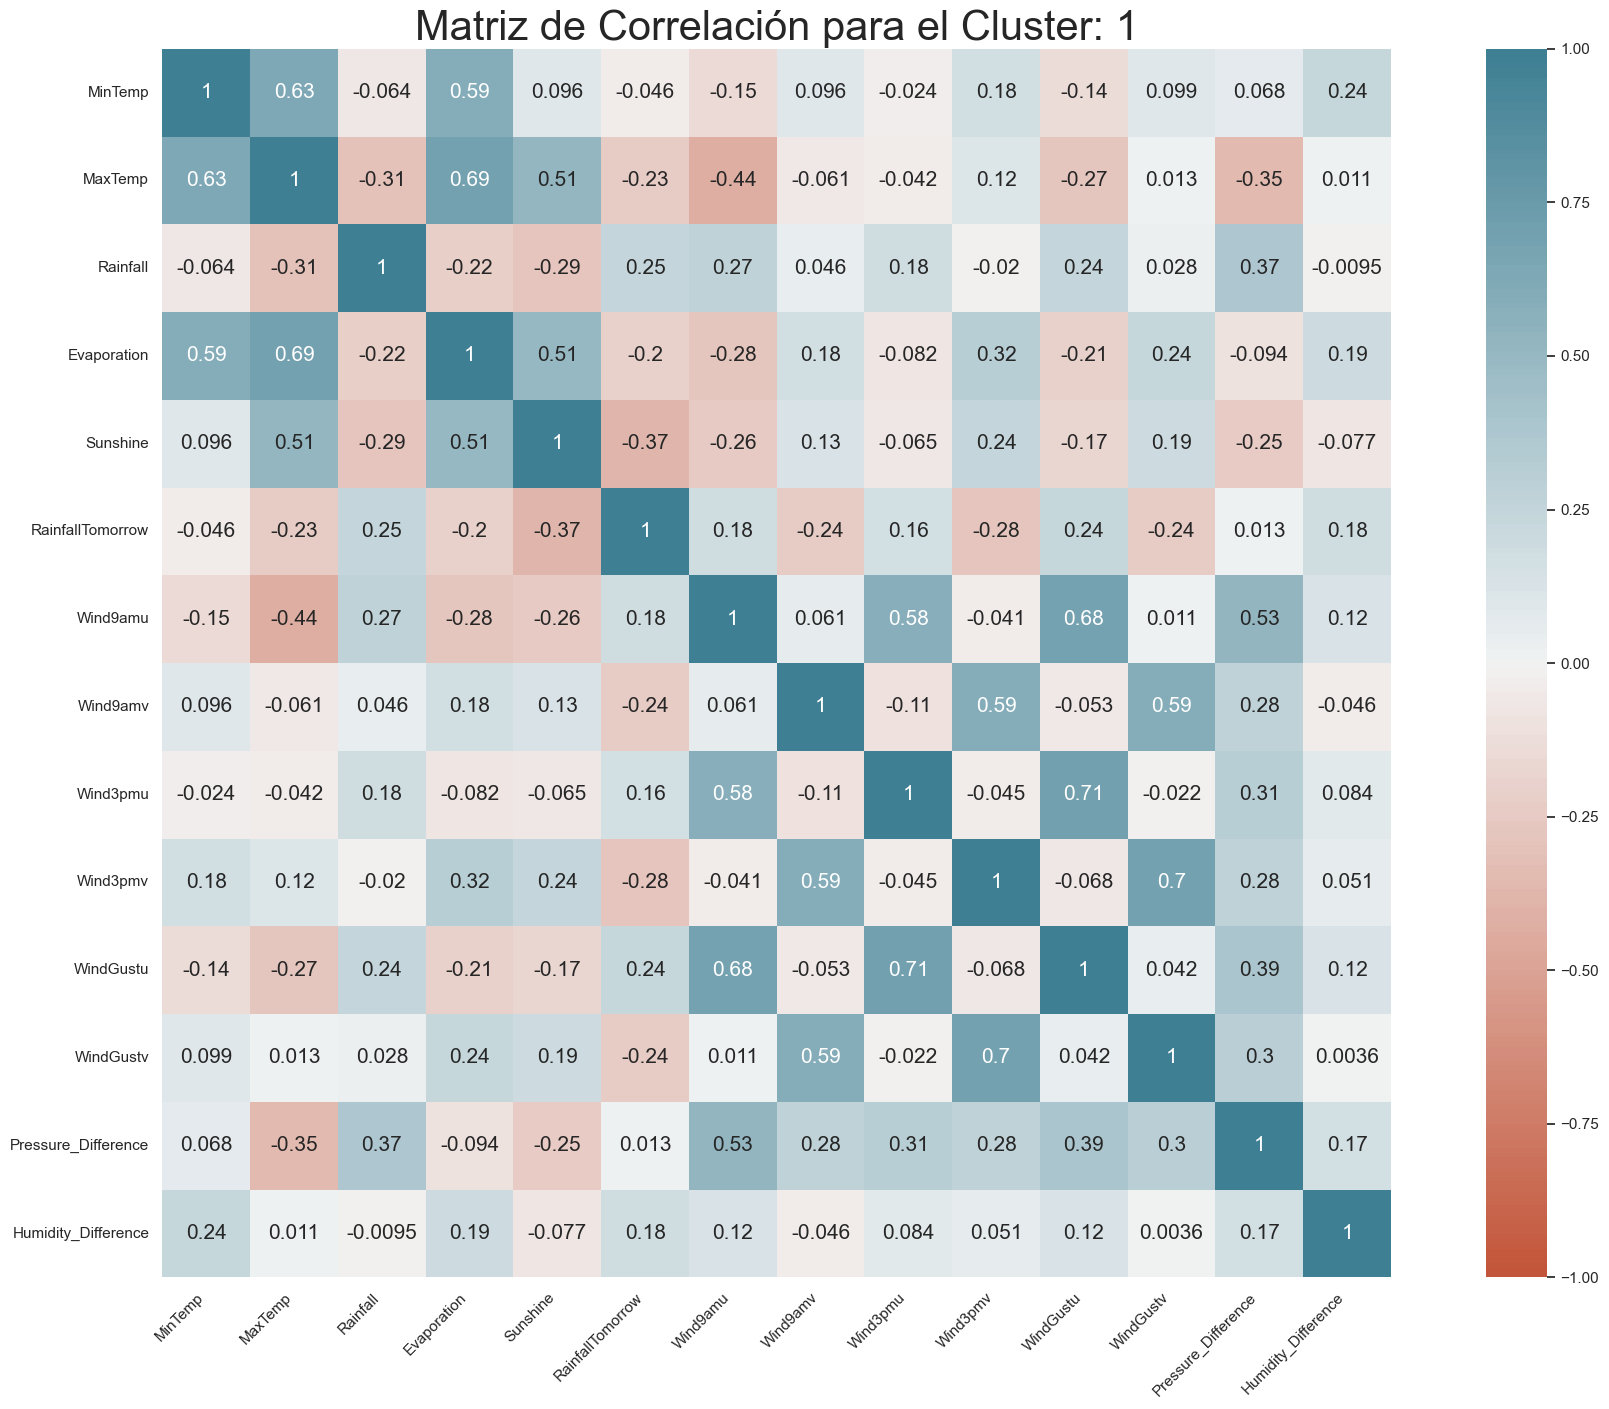

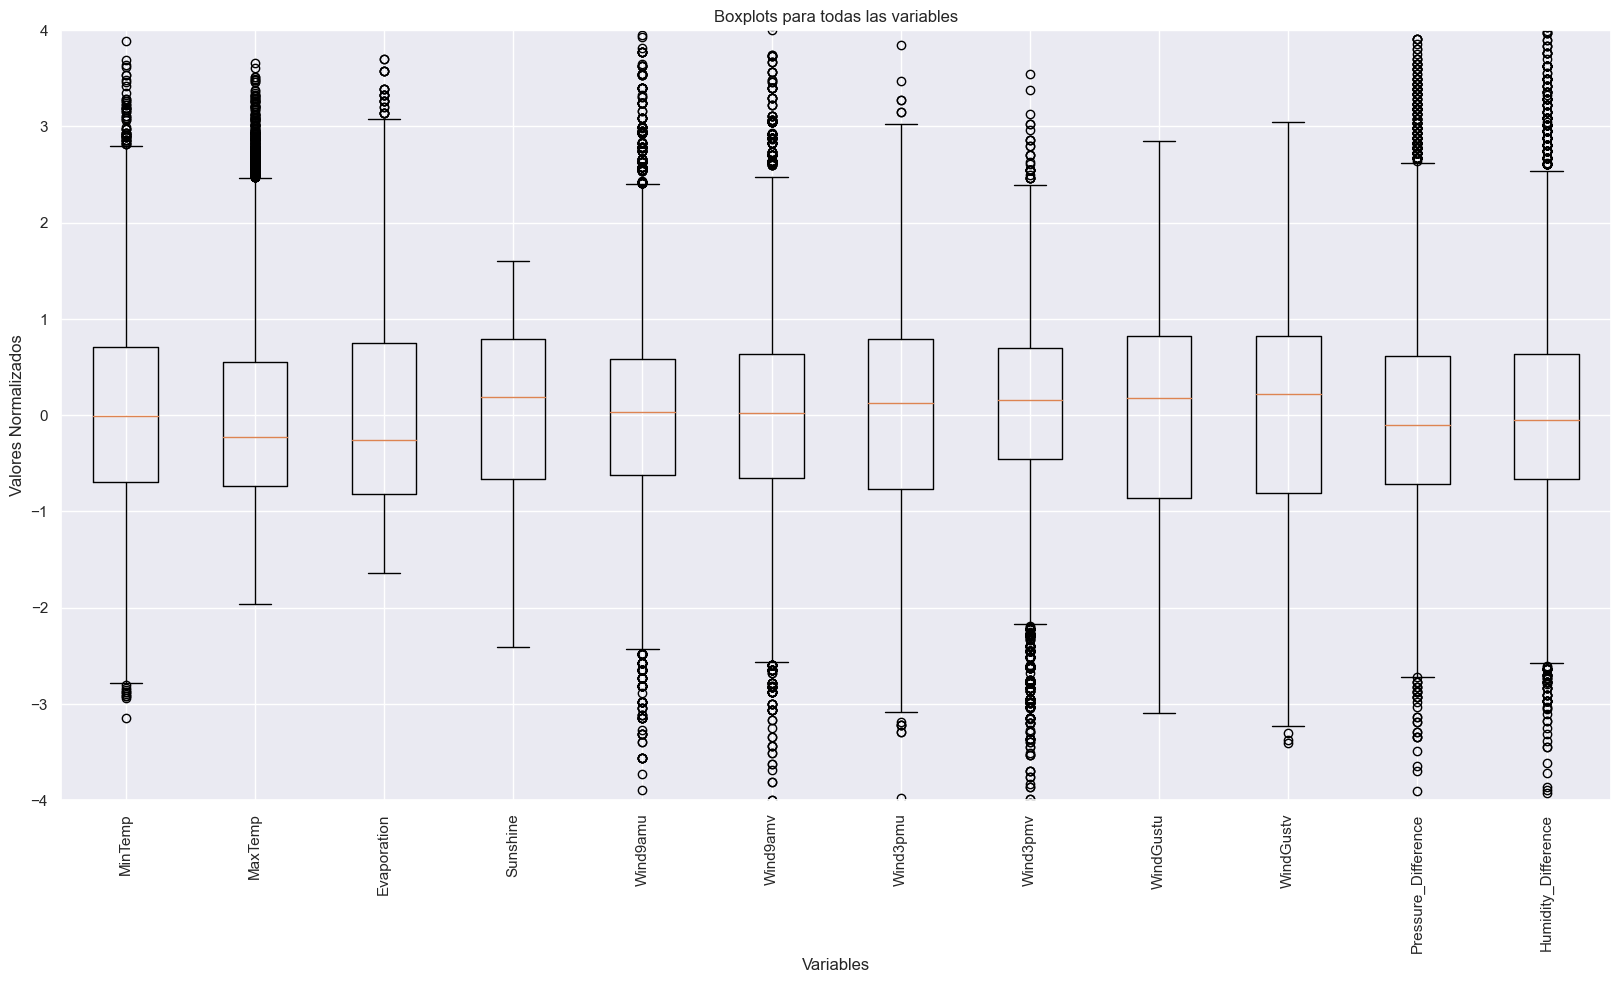

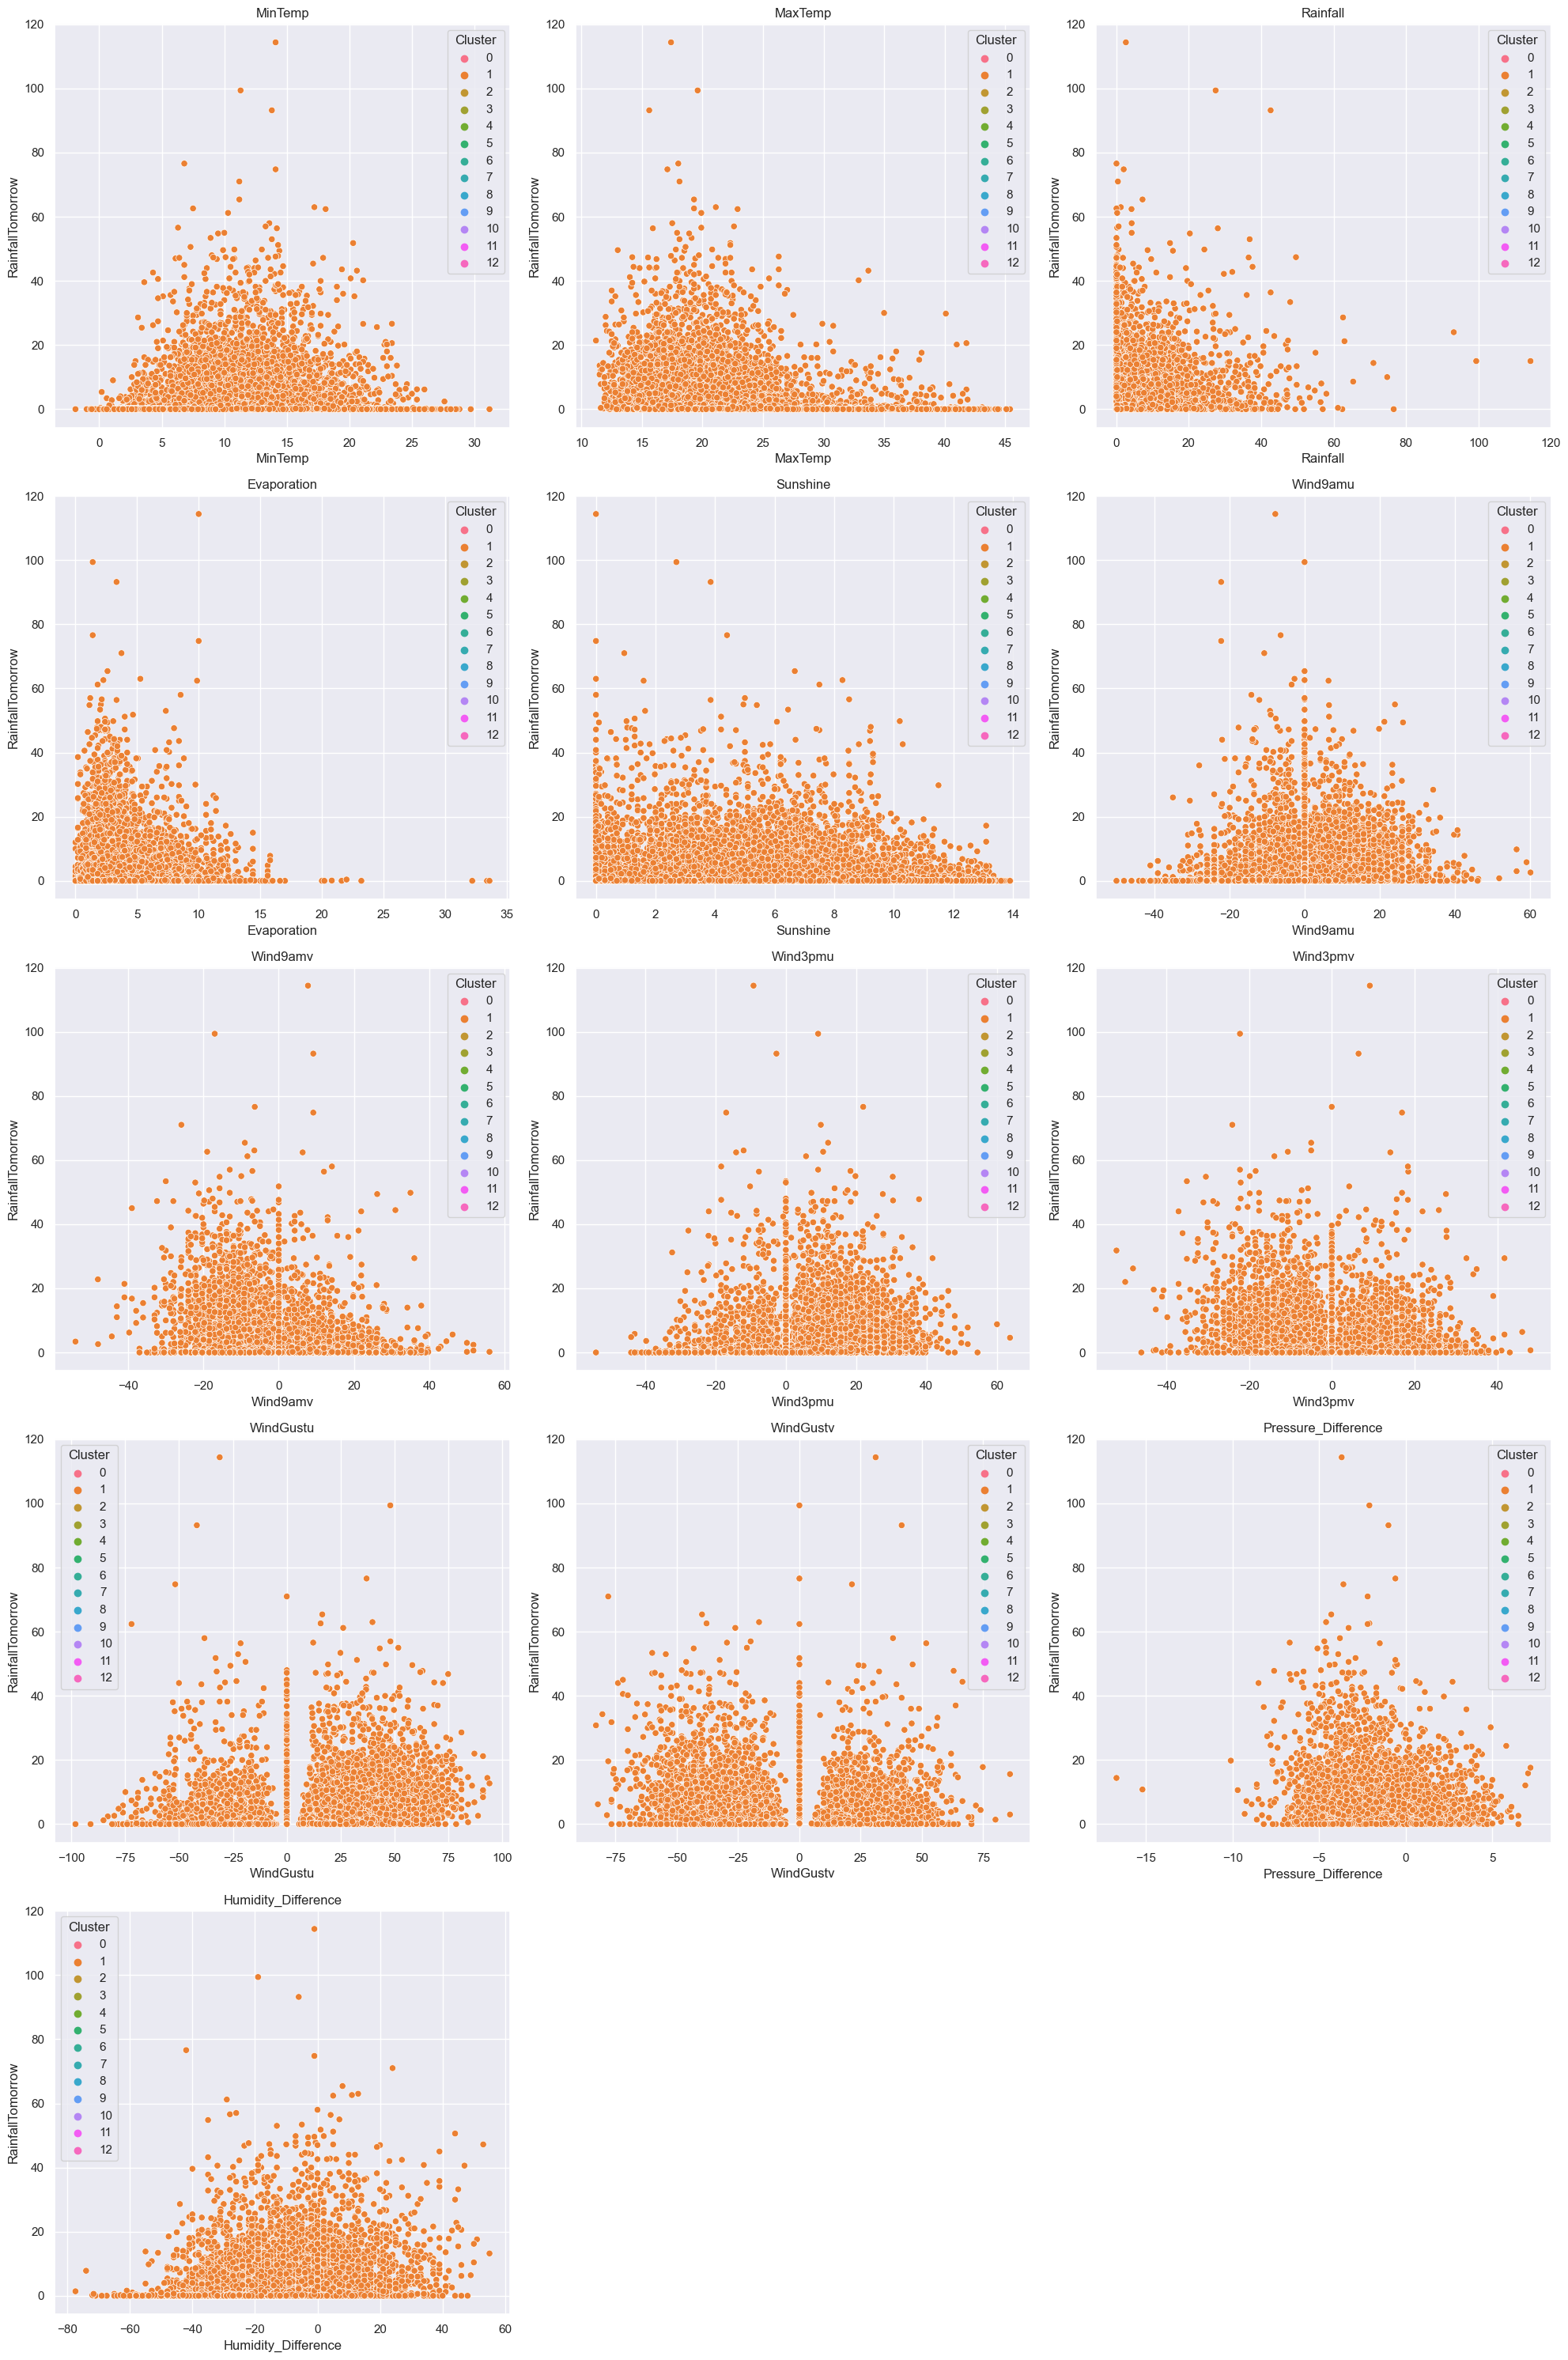

In [16]:
graficos(cluster_dataframe(df,1))

Y también tenemos un método que nos permite ver los boxplot para un mes particular, en caso de que sea necesario.

## Eliminación de Outliers ##
Diseñamos una función que recibe el dataframe y nos elimina del mismo aquellos registros que presentan outliers en alguna de las variables númericas teniendo en cuenta un threshold que puede ser modificado para hacerlo mas o menos restrictivo. En este caso tomamos un valor de 1.5 lo que significa que eliminaremos aquellos valores que esten a mas de 1.5 veces el rango intercuartilico.

In [17]:
def remove_outliers(df, threshold=1.5):
    cleaned_df = df.copy()
    columns = df.drop(['RainTomorrow','RainfallTomorrow','RainToday','Rainfall'],axis=1).select_dtypes(include=[float, int])
    for column in columns:
        if column in df.columns:
            # Calcular el rango intercuartílico (IQR)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para identificar valores atípicos
            lower_limit = Q1 - threshold * IQR
            upper_limit = Q3 + threshold * IQR

            # Eliminar valores atípicos
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_limit) & (cleaned_df[column] <= upper_limit)]

    return cleaned_df

cleaned_df = remove_outliers(df)
print("Cantidad de datos removidos:", len(df) - len(cleaned_df))
cleaned_df

Cantidad de datos removidos: 13576


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          9.6      13.0   
1      2008-12-02   Albury      7.4     25.1       0.0         13.0      13.2   
2      2008-12-03   Albury     12.9     25.7       0.0         10.2      13.2   
3      2008-12-04   Albury      9.2     28.0       0.0         11.0      10.8   
4      2008-12-05   Albury     17.5     32.3       1.0          6.6       8.1   
...           ...      ...      ...      ...       ...          ...       ...   
144980 2016-04-19    Uluru     13.5     35.2       0.0          9.6      10.9   
144981 2016-04-20    Uluru     18.8     31.7       0.0          8.0       9.9   
144985 2016-04-24    Uluru     12.1     27.3       0.0          8.2      11.0   
144986 2016-04-25    Uluru      9.6     28.8       0.0          7.8      11.0   
144987 2016-04-26    Uluru     11.0     32.5       0.0          8.0      11.0   

       RainToday RainTomorrow  RainfallTomorrow Cluster   Wind9amu   Wind9amv  \
0             No           No               0.0       0  20.000000   0.000000   
1             No           No               0.0       0   1.530734  -3.695518   
2             No           No               0.0       0  19.000000   0.000000   
3             No           No               1.0       0  -7.778175   7.778175   
4             No           No               0.2       0  -6.467157  -2.678784   
...          ...          ...               ...     ...        ...        ...   
144980        No           No               0.0       2  -9.000000   0.000000   
144981        No           No               0.0       2   0.000000  17.000000   
144985        No           No               0.0       2 -20.325350  -8.419036   
144986        No           No               0.0       2 -13.000000   0.000000   
144987        No           No               0.0       2 -11.000000   0.000000   

         Wind3pmu   Wind3pmv  WindGustu  WindGustv  Pressure_Difference  \
0       22.173109  -9.184402  44.000000   0.000000                 -0.6   
1       20.325350   8.419036  40.650699 -16.838071                 -2.8   
2       24.020868   9.949769  42.498458  17.603438                  1.1   
3       -9.000000   0.000000 -16.970563 -16.970563                 -4.8   
4       14.142136 -14.142136  41.000000   0.000000                 -4.8   
...           ...        ...        ...        ...                  ...   
144980  11.000000   0.000000  28.640266  11.863186                 -3.1   
144981 -13.435029 -13.435029  11.863186  28.640266                 -2.8   
144985 -19.000000   0.000000 -31.000000   0.000000                 -4.8   
144986  -3.444151  -8.314916 -30.000000   0.000000                 -4.6   
144987  16.970563 -16.970563   0.000000 -33.000000                 -4.9   

        Humidity_Difference          Estado_Cielo  
0                     -49.0           Muy Nublado  
1                     -19.0  Parcialmente Nublado  
2                      -8.0  Parcialmente Nublado  
3                     -29.0               Nublado  
4                     -49.0           Muy Nublado  
...                     ...                   ...  
144980                -18.0  Parcialmente Nublado  
144981                -20.0           Muy Nublado  
144985                -21.0             Despejado  
144986                -15.0             Despejado  
144987                -16.0  Parcialmente Nublado  

[118456 rows x 20 columns]

## Análisis de Balance ##
Para analizar el balance necesitamos determinar si la distribución de las variables target, en este caso categóricas esta uniformemente distribuida. Para eso diseñamos el siguiente método. Pretendemos que los scores estén cerca de 0.5 lo que representaría una distribución uniforme de los datos.

In [18]:
def check_balance(df, target_columns):

    balance_scores = {}

    for column in target_columns:
        class_counts = df[column].value_counts()
        num_classes = len(class_counts)
        max_count = class_counts.max()
        balance_score = max_count / len(df)
        balance_scores[column] = balance_score

    return balance_scores

target_columns = ["RainTomorrow"]
balance_scores = check_balance(cleaned_df, target_columns)
print("Balance Scores:")
for column, score in balance_scores.items():
    print(f"{column}: {score}")

Balance Scores:
RainTomorrow: 0.7848568244749106


Dado que el valor de balance ronda el 0.8, el target RainTomorrow presentan una distribución no uniforme para sus respectivos valores. Esto quiere decir que el dataset no está balanceado.

## Selección de características y Estandarización ##

Para predecir la lluvia del día siguiente, decidimos trabajar con todas las variables (originales o transformadas) del dataset.

In [19]:
def dataframe_normalized(df,features):
    df_normalized = df.copy()
    skystate = {
        'Despejado' :               0,
        'Parcialmente Nublado' :    1,
        'Nublado' :                 2,
        'Muy Nublado' :             3
    }
    df_normalized['RainToday'] = df_normalized['RainToday'].map({'No': 0, 'Yes': 1})
    df_normalized['RainTomorrow'] = df_normalized['RainTomorrow'].map({'No': 0, 'Yes': 1})
    df_normalized['Date']=df_normalized['Date'].dt.dayofyear
    df_normalized['Estado_Cielo'] = df_normalized['Estado_Cielo'].map(skystate)
    scaler = StandardScaler()
    df_normalized[features] = scaler.fit_transform(df_normalized[features])
    return df_normalized

def obtención_de_datos(df,features,target,date=1):
    df_copy=df.copy()
    x=df_copy[features].values.reshape(-1,len(features))
    y=df_copy[target].values.reshape(-1,1)
    return x,y

In [20]:
columns =   [
                'MinTemp', 
                'MaxTemp', 
                'Evaporation',
                'Sunshine',
                'Wind9amu', 
                'Wind9amv', 
                'Wind3pmu', 
                'Wind3pmv', 
                'WindGustu',
                'WindGustv', 
                'Pressure_Difference',
                'Humidity_Difference',
                'Estado_Cielo',
                'Cluster',
                'Date'
            ]

x,y=obtención_de_datos(dataframe_normalized(cleaned_df,columns),columns,'RainfallTomorrow')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Modelos y Rendimiento ##

In [21]:
def r2_score(y_true,y_pred):
    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def r2_ajusted(y_true,y_pred,n,p):
    r2 = r2_score(y_true,y_pred)
    r2_ajustado = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return r2_ajustado

def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

### Regresión Global ###

In [22]:
# Crear un modelo de regresión lineal
lr = LinearRegression(fit_intercept=True)

# Ajustar el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lr.predict(X_test)

# Calcular las métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir las métricas de evaluación
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2 ajustado: {r2_ajusted(y_test,y_pred,len(y_test),len(X_test[0])):.4f}")

R^2: 0.1222
MSE: 60.1055
RMSE: 7.7528
MAE: 3.3385
R^2 ajustado: 0.1217


### Regresión por Cluster ###

In [23]:
cluster_results = pd.DataFrame(columns=['Cluster', 'R^2', 'MSE', 'RMSE', 'MAE'])
for i in range(1,13):
    cl=cluster_dataframe(cleaned_df,i)
    if len(cl)<100:
        continue
    x_cl,y_cl=obtención_de_datos(dataframe_normalized(cl,columns),columns,'RainfallTomorrow')
    X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(x_cl, y_cl, test_size=0.2, random_state=1)
    lr = LinearRegression(fit_intercept=True)# Ajustar el modelo a los datos de entrenamiento
    lr.fit(X_cl_train, y_cl_train)

    # Realizar predicciones en el conjunto de prueba
    y_cl_pred = lr.predict(X_cl_test)

    # Calcular las métricas de evaluación
    r2 = r2_score(y_cl_test, y_cl_pred)
    mse = mean_squared_error(y_cl_test, y_cl_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_cl_test, y_cl_pred)

    cluster_results = cluster_results.append({'Cluster': i, 'R^2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

cluster_results

AttributeError: 'DataFrame' object has no attribute 'append'

### Regresión por Ciudad ###

In [ ]:
ciudades=cleaned_df['Location'].unique()
city_results = pd.DataFrame(columns=['Cluster', 'Cant_datos', 'R^2', 'MSE', 'RMSE', 'MAE'])
for i in ciudades:

        x_c,y_c=obtención_de_datos(dataframe_normalized(city_dataframe(cleaned_df,i),columns),columns,'RainfallTomorrow')
        X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(x_c, y_c, test_size=0.2, random_state=1)
        lr = LinearRegression(fit_intercept=True)# Ajustar el modelo a los datos de entrenamiento
        lr.fit(X_c_train, y_c_train)

        # Realizar predicciones en el conjunto de prueba
        y_c_pred = lr.predict(X_c_test)

        # Calcular las métricas de evaluación
        r2 = r2_score(y_c_test, y_c_pred)
        mse = mean_squared_error(y_c_test, y_c_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_c_test, y_c_pred)

        city_results = city_results.append({'Cluster': i, 'Cant_datos':len(city_dataframe(cleaned_df,i)), 'R^2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

city_results

Cluster Cant_datos       R^2         MSE       RMSE       MAE
0             Albury       2486  0.210013   29.938534   5.471612  2.568001
1      BadgerysCreek       2805  0.085651   25.008885   5.000888  2.993469
2              Cobar       2780  0.199090   13.022253   3.608636  1.743704
3       CoffsHarbour       2828  0.145046  150.645788  12.273785  6.333264
4              Moree       2688  0.130912   71.959254   8.482880  3.372313
5          Newcastle       2877  0.154904   93.126913   9.650229  4.353917
6          NorahHead       2667  0.159793   71.137385   8.434298  4.328332
7      NorfolkIsland       2168  0.167837   42.028852   6.482966  3.562592
8            Penrith       2864  0.204497   37.442935   6.119063  3.080493
9           Richmond       2735  0.193588   38.706094   6.221422  3.149700
10            Sydney       3149  0.214570   66.601343   8.160965  4.073776
11     SydneyAirport       2569  0.143908   71.272635   8.442312  4.030972
12        WaggaWagga       2403  0.301561   16.025936   4.003241  2.243534
13       Williamtown       2537  0.078654   73.935343   8.598566  4.688010
14        Wollongong       2634  0.122729   90.457081   9.510893  4.761273
15          Canberra       3171  0.198496   24.649683   4.964845  2.592975
16       Tuggeranong       2876  0.022727   26.849409   5.181642  2.992296
17       MountGinini       2360  0.189477   71.543453   8.458336  4.361074
18          Ballarat       2481  0.165103   28.308664   5.320589  2.382257
19           Bendigo       2881  0.298775   15.715709   3.964304  2.304681
20              Sale       2173  0.175627   14.520185   3.810536  2.009320
21  MelbourneAirport       2259  0.034387   11.577154   3.402522  1.890783
22         Melbourne       2477  0.104199   20.138103   4.487550  2.159087
23           Mildura       2808  0.120148   11.988967   3.462509  1.616075
24              Nhil       1019  0.089699    4.733196   2.175591  1.194773
25          Portland       2182  0.108425   27.476908   5.241842  2.623412
26          Watsonia       2717  0.117407   14.739349   3.839186  2.205999
27          Dartmoor       2257  0.167937   19.471776   4.412684  2.402513
28          Brisbane       3151  0.171984  147.453708  12.143052  5.072993
29            Cairns       2569  0.214525  221.137391  14.870689  7.637608
30         GoldCoast       2541  0.170192   90.606587   9.518749  4.433249
31        Townsville       2514  0.178594  126.310212  11.238782  5.149159
32          Adelaide       2286  0.169665   12.239380   3.498483  1.903058
33      MountGambier       2233  0.213739   15.655145   3.956658  2.305376
34         Nuriootpa       2376  0.101405   23.176228   4.814170  1.734135
35           Woomera       1896  0.052644   12.063872   3.473308  1.148843
36            Albany       2691  0.195813   23.129371   4.809300  2.756779
37       Witchcliffe       2856  0.249910   43.566032   6.600457  3.427164
38        PearceRAAF       2718  0.216766   25.488379   5.048602  2.409624
39      PerthAirport       2626  0.270112   20.273845   4.502649  2.423684
40             Perth       3097  0.237617   22.574348   4.751247  2.509087
41           Walpole       2826  0.290924   22.998485   4.795674  3.048372
42            Hobart       1678  0.166689   14.404070   3.795269  2.122505
43        Launceston       1661  0.086752   23.987273   4.897680  2.507613
44      AliceSprings       1936  0.173588   17.362409   4.166822  1.732570
45            Darwin       3014  0.107404   85.924652   9.269555  5.694155
46         Katherine       1518  0.139569  203.482896  14.264743  5.253005
47             Uluru        857  0.071961   13.669681   3.697253  1.248202

De los resultados obtenemos la conclusión de que el modelo se comporta mejor cuando no consideramos todas las ciudades en un mismo conjunto. Podemos usar un modelo por cluster o uno por ciudad y salvo raras excepciones, dichos modelos presentarán un mejor rendimiento que el modelo global. Estas diferencias podrían deberse a que las ciudades presentan distintos climas y por lo tanto distintos patrones de comportamiento.	

### Gradient Descent ###

In [ ]:
#Función Gradient Descent

def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    
    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # print(f"Error de entrenamiento final: {train_errors[-1]:.4f}")
    # print(f"Error de prueba final: {test_errors[-1]:.4f}")
    # print(f"Pesos finales: {W.T}")

    # # Graficar errores de entrenamiento y prueba
    # # Definir una figura
    # plt.figure(figsize=(12, 6))
    # # Plotear errores de entrenamiento
    # plt.plot(train_errors, label='Error de entrenamiento')
    # # Plotear errores de prueba
    # plt.plot(test_errors, label='Error de test')
    # # Poner labels en los ejes
    # plt.xlabel('Época')
    # plt.ylabel('Error cuadrático medio')
    # # Activar la leyenda
    # plt.legend()
    # # Poner titulo
    # plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # # Terminar y mostrar gráfico
    # plt.show()

    return W

In [ ]:
W = gradient_descent(X_train, y_train, X_test, y_test, lr=0.00001, epochs=100)

# Calcular predicciones en el conjunto de prueba
y_pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), W)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R^2: -0.0377
MSE: 64.2772
RMSE: 8.0173
MAE: 4.3690


Para ambos modelos, las métricas de evaluación indican que el modelo actual tiene un rendimiento insatisfactorio. El coeficiente de determinación (R^2) es bajo, lo que significa que el modelo no logra explicar con mucha precisión los datos. Además, el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE) son relativamente altos, lo que sugiere que las predicciones del modelo tienen errores significativos en comparación con los valores reales. El Error Absoluto Medio (MAE) muestra un error absoluto promedio de alrededor de 4 unidades en la misma escala que los datos. En general, estos resultados indican que el modelo necesita mejoras o que la relación entre las características y la variable de respuesta no se está modelando de manera adecuada

In [ ]:
gd_city_results = pd.DataFrame(columns=['Cluster', 'Cant_datos', 'R^2', 'MSE', 'RMSE', 'MAE'])
for i in ciudades:
        W = gradient_descent(X_train, y_train, X_test, y_test, lr=0.00001, epochs=100)

        # Calcular predicciones en el conjunto de prueba
        y_pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), W)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        gd_city_results = gd_city_results.append({'Cluster': i, 'Cant_datos':len(city_dataframe(cleaned_df,i)), 'R^2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

gd_city_results

Cluster Cant_datos       R^2         MSE       RMSE       MAE
0             Albury       2486 -0.425449   88.292205   9.396393  4.827909
1      BadgerysCreek       2805 -0.245796   77.164498   8.784333  4.346202
2              Cobar       2780 -0.258327   77.940641   8.828400  4.311487
3       CoffsHarbour       2828 -0.150942   71.289244   8.443296  3.844724
4              Moree       2688 -0.486064   92.046638   9.594094  4.798026
5          Newcastle       2877 -0.277581   79.133250   8.895687  4.963751
6          NorahHead       2667 -0.337314   82.833084   9.101268  4.436393
7      NorfolkIsland       2168 -0.391993   86.219912   9.285468  4.689616
8            Penrith       2864 -0.266429   78.442466   8.856775  4.433045
9           Richmond       2735 -0.371585   84.955869   9.217151  5.529935
10            Sydney       3149 -0.311418   81.229135   9.012721  4.899360
11     SydneyAirport       2569 -0.417962   87.828436   9.371683  5.054122
12        WaggaWagga       2403 -0.214613   75.233039   8.673698  4.425286
13       Williamtown       2537 -0.116798   69.174365   8.317113  3.739957
14        Wollongong       2634 -0.207279   74.778754   8.647471  4.052063
15          Canberra       3171 -0.730061  107.159847  10.351804  6.029480
16       Tuggeranong       2876 -0.276874   79.089477   8.893226  4.546985
17       MountGinini       2360 -0.484652   91.959181   9.589535  5.096059
18          Ballarat       2481 -0.322520   81.916754   9.050787  4.843117
19           Bendigo       2881 -0.311641   81.242914   9.013485  4.602702
20              Sale       2173 -0.284659   79.571632   8.920293  4.780108
21  MelbourneAirport       2259 -0.340192   83.011348   9.111056  4.442908
22         Melbourne       2477 -0.518709   94.068662   9.698900  5.261078
23           Mildura       2808 -0.617402  100.181739  10.009083  5.913571
24              Nhil       1019 -0.338835   82.927332   9.106445  5.134934
25          Portland       2182 -0.426068   88.330542   9.398433  5.166184
26          Watsonia       2717 -0.569594   97.220518   9.860047  5.617231
27          Dartmoor       2257 -0.207981   74.822208   8.649983  4.852402
28          Brisbane       3151 -0.145774   70.969106   8.424316  3.583054
29            Cairns       2569 -0.634601  101.247035  10.062159  5.672024
30         GoldCoast       2541 -0.291285   79.982085   8.943270  4.175016
31        Townsville       2514 -0.133526   70.210520   8.379172  3.515821
32          Adelaide       2286 -0.218276   75.459899   8.686766  4.042160
33      MountGambier       2233 -0.159460   71.816834   8.474481  4.050890
34         Nuriootpa       2376 -0.477905   91.541295   9.567722  5.323488
35           Woomera       1896 -0.270565   78.698684   8.871228  4.265478
36            Albany       2691 -0.499769   92.895543   9.638233  4.583152
37       Witchcliffe       2856 -0.287222   79.730391   8.929188  4.205651
38        PearceRAAF       2718 -0.520411   94.174135   9.704336  5.528705
39      PerthAirport       2626 -0.535738   95.123473   9.753126  5.880092
40             Perth       3097 -0.910629  118.344196  10.878612  6.376169
41           Walpole       2826 -0.822603  112.891839  10.625057  6.414619
42            Hobart       1678 -0.263401   78.254965   8.846184  4.106693
43        Launceston       1661 -0.333176   82.576807   9.087178  5.325504
44      AliceSprings       1936 -0.221108   75.635286   8.696855  4.178989
45            Darwin       3014 -0.425642   88.304134   9.397028  4.457655
46         Katherine       1518 -0.388052   85.975841   9.272316  4.718222
47             Uluru        857 -0.333524   82.598347   9.088363  4.299864

## Regularización ##

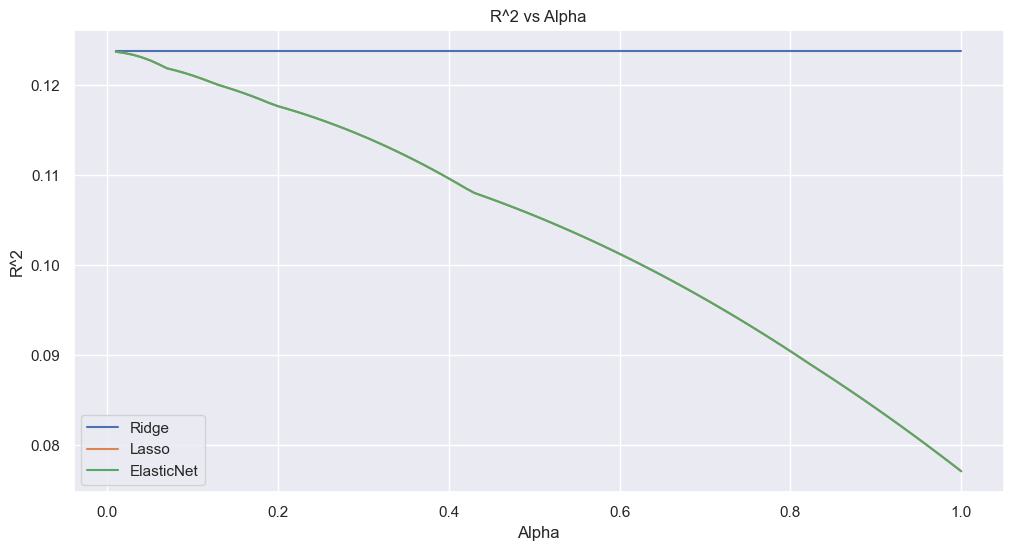

In [ ]:
alphas = np.linspace(0.01, 1, 100)
score_ridge = []
score_lasso = []
score_elasticnet = []
for alpha in alphas:
    #print("Alpha:", alpha)
    # Crear modelos de regresión lineal, Lasso y Ridge
    lr = LinearRegression()
    lasso = Lasso(alpha)
    ridge = Ridge(alpha)
    elasticnet = ElasticNet(alpha, l1_ratio=1)

    # Ajustar modelos a los datos
    lr.fit(x, y)
    lasso.fit(x, y)
    ridge.fit(x, y)
    elasticnet.fit(x,y)

    score_ridge.append(ridge.score(x,y))
    score_lasso.append(lasso.score(x,y))
    score_elasticnet.append(elasticnet.score(x,y))

plt.figure(figsize=(12, 6))
plt.plot(alphas, score_ridge, label='Ridge')
plt.plot(alphas, score_lasso, label='Lasso')
plt.plot(alphas, score_elasticnet, label='ElasticNet')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()
plt.title('R^2 vs Alpha')
plt.show()

Text(0.5, 1.0, 'R^2 vs L1')

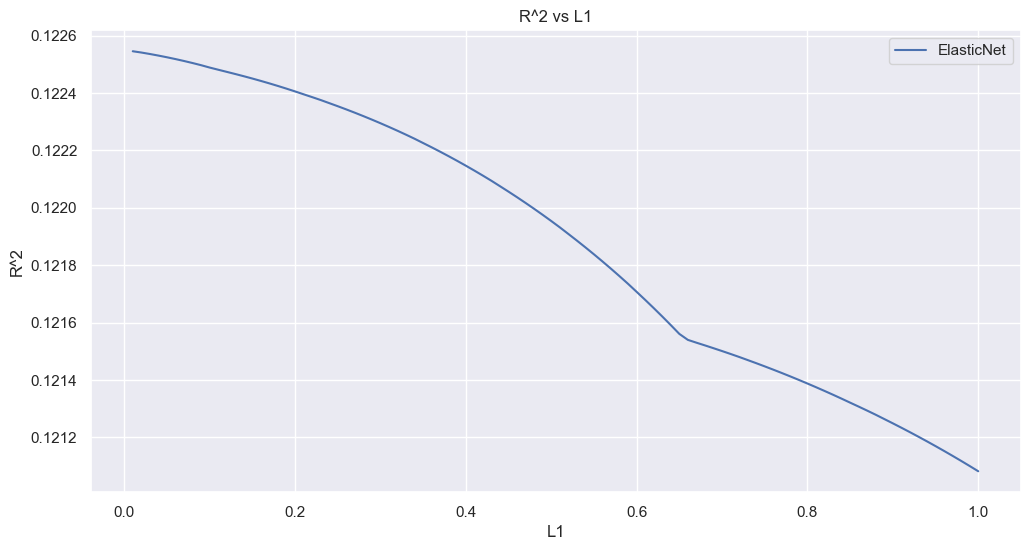

In [ ]:
l1=np.linspace(0.01, 1, 100)
score_elasticnet = []
for l in l1:
    # Crear modelos de regresión lineal, Lasso y Ridge
    lr = LinearRegression()
    elasticnet = ElasticNet(alpha=0.1, l1_ratio=l)
    score_elasticnet.append(elasticnet.fit(x,y).score(x,y))

plt.figure(figsize=(12, 6))
plt.plot(l1, score_elasticnet, label='ElasticNet')
plt.xlabel('L1')
plt.ylabel('R^2')
plt.legend()
plt.title('R^2 vs L1')

La mala performance puede deberse, a distintos factores entre los que se encuentran:
- La transformación de los datos no fue la adecuada.
- Los outliers en los datos son mas de los que se esperaba y no se eliminaron correctamente, o inversamente, al eliminar ciertos outliers perdimos información importante.
- La cantidad de datos no es suficiente para entrenar un modelo de regresión lineal.
- La relación entre las variables y la variable target no es lineal.
- La cantidad de variables es muy grande y no todas son relevantes para el modelo.
- La cantidad de variables es muy grande y existe multicolinealidad entre ellas.

Nuestra hipótesis es que un modelo de regresión lineal no es el adecuado para este problema, ya que la relación entre las variables y la variable target no es lineal, esto pudo notarse también al hacer la visualización de los datos, los gráficos presentados podrían haber estado prediciendo este resultado. Por lo tanto, se debería utilizar un modelo de regresión no lineal, como por ejemplo un modelo de regresión polinomial. Se intentara mejorar los resultados en el futuro. 

## Regresión Logística ##

Pretendemos predecir ahora la variable "RainTomorrow" que es una variable categórica. Para esto utilizaremos un modelo de regresión logística. Mostraremos los boxplots según variables para encontrar cuáles de ellas pueden darnos información mas significativa.

In [ ]:
columns =   [
                    'MinTemp', 
                    'MaxTemp', 
                    'Evaporation',
                    'Sunshine',
                    'Wind9amu', 
                    'Wind9amv', 
                    'Wind3pmu', 
                    'Wind3pmv', 
                    'WindGustu',
                    'WindGustv', 
                    'Pressure_Difference',
                    'Humidity_Difference'
            ]

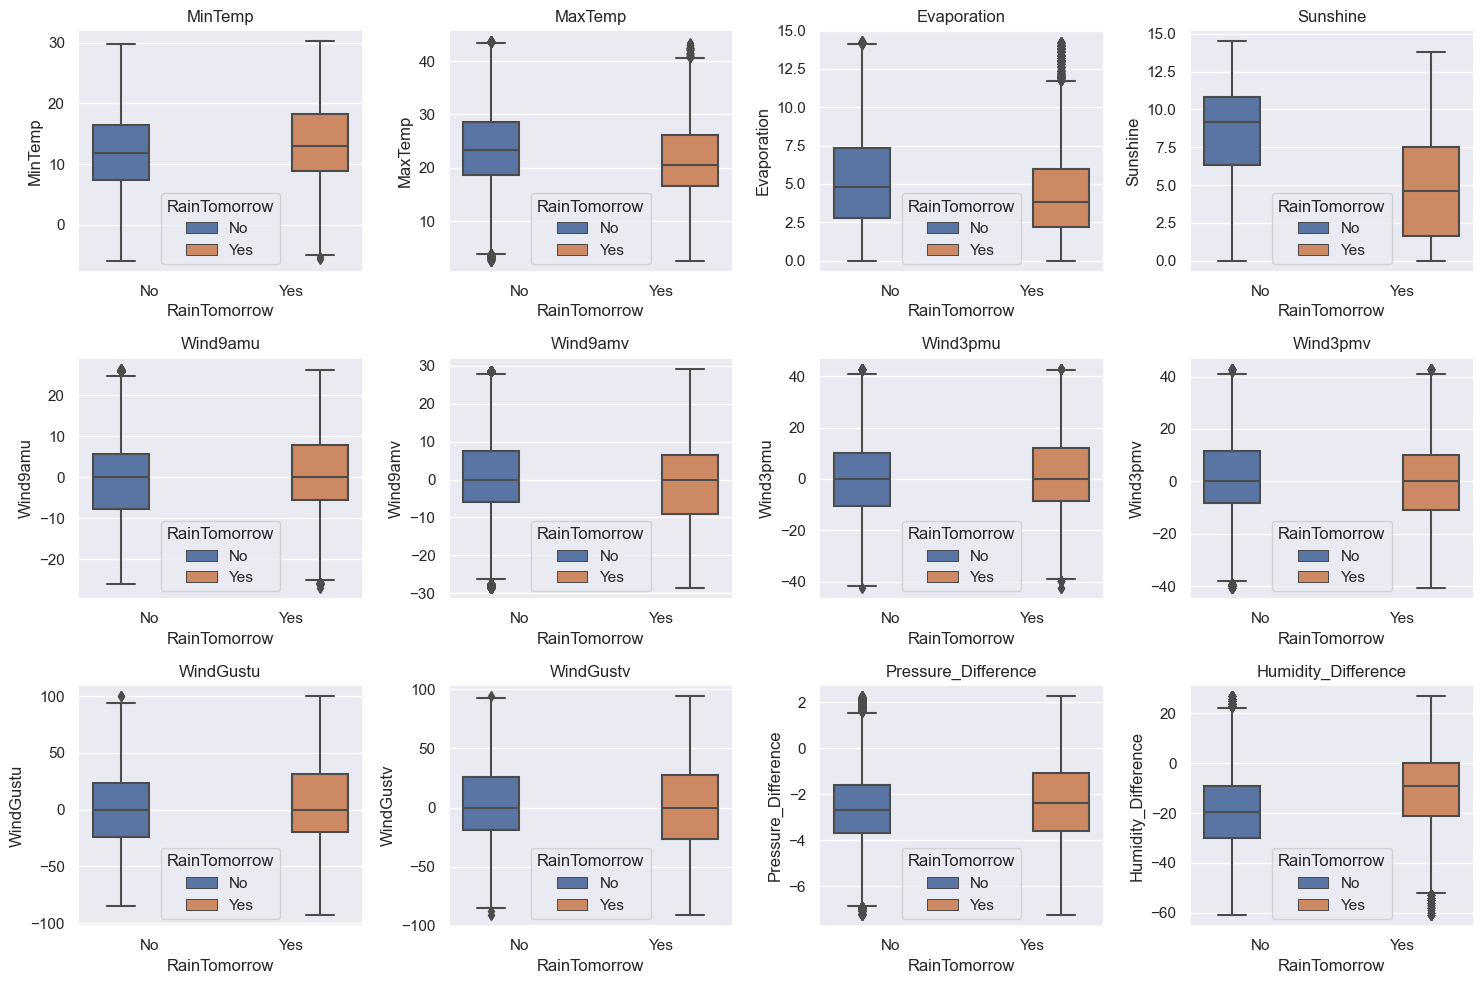

In [ ]:
# Crea una figura y subplots
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera sobre las columnas y crea un gráfico en cada subplot
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=cleaned_df, x='RainTomorrow', y=column, hue='RainTomorrow', ax=ax)
    ax.set_title(column)

# Ajusta el diseño y muestra la figura
plt.tight_layout()
plt.show()

Vemos que casi todas las variables mantienen una distribución similar para ambos valores de la variable target, excepto para las variables "Sunshine" que presenta una distribución muy distinta para ambos valores de la variable target y en menor medida pero que aún se podría considerar importante, la vairable "Humidity_Difference". Esto nos indica que ambas variables podrían ser muy significativas para nuestro modelo.

In [25]:
x,y=obtención_de_datos(cleaned_df,['Sunshine','Humidity_Difference'],'RainTomorrow',0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

print("Resultados con regresión logística\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calcular las métricas de evaluación
print(accuracy_score(y_test, y_pred))

Resultados con regresión logística

              precision    recall  f1-score   support

          No       0.90      0.76      0.83     18527
         Yes       0.45      0.70      0.55      5165

    accuracy                           0.75     23692
   macro avg       0.68      0.73      0.69     23692
weighted avg       0.80      0.75      0.76     23692

[[14118  4409]
 [ 1558  3607]]
0.7481428330238055


### Resultados de la Clasificación

**Matriz de Confusión:**

- **Verdaderos Positivos (True Positives, TP):** 3577. Son los casos en los que el modelo predijo "Sí" y la respuesta real fue "Sí".

- **Falsos Positivos (False Positives, FP):** 4648. Son los casos en los que el modelo predijo "Sí" pero la respuesta real fue "No".

- **Verdaderos Negativos (True Negatives, TN):** 13990. Son los casos en los que el modelo predijo "No" y la respuesta real fue "No".

- **Falsos Negativos (False Negatives, FN):** 1564. Son los casos en los que el modelo predijo "No" pero la respuesta real fue "Sí".

**Métricas de Evaluación:**

- **Precisión (Precision):** Es la proporción de verdaderos positivos respecto a todos los positivos predichos. En este caso, la precisión para la etiqueta "No" es 0.90 lo que significa que el 90% de las predicciones positivas para "No" son correctas, mientras que para la etiqueta "Yes" es 0.43, lo que significa que el 43% de las predicciones positivas para "Yes" son correctas.

- **Recall:** Es la proporción de verdaderos positivos respecto a todos los verdaderos positivos y falsos negativos. En este caso, el recall es 0.75 para la etiqueta "No" y 0.70 para la etiqueta "Yes" lo que significa que el modelo captura el 75% de todos los casos reales de "No" y el 70% de todos los casos reales de "Yes".

- **F1-score:** Es la media armónica de precisión y recall. En este caso, el F1-score para la etiqueta "Yes" es 0.54 y 0.82 para la etiqueta "No".

- **Exactitud (Accuracy):** Es la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) respecto al total de muestras. En este caso, la exactitud es 0.74, lo que significa que el 74% de las predicciones son correctas.

En resumen, los resultados indican que el modelo de regresión logística tiene un buen rendimiento en la clasificación de la etiqueta "No" (alta precisión y recall), pero un rendimiento más bajo en la clasificación de la etiqueta "Yes". La exactitud general del modelo es del 74%, lo que sugiere que el modelo es moderadamente bueno en general, pero podría mejorar su capacidad para predecir la etiqueta "Yes". La falta de balance del dataset podría ser un indicador muy fuerte de este resultado.


In [1]:
y = [1 if i == "Yes" else 0 for i in y]

# Visualizar los datos y la frontera de decisión del modelo
plt.figure(figsize=(20, 10))

sns.scatterplot(data=cleaned_df, x='Sunshine', y='Humidity_Difference', hue='RainTomorrow', palette=['red', 'blue'], sizes=(50, 200))

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.4)

plt.xlabel('Sunshine')
plt.ylabel('Humidity_Difference')
plt.title('Regresión Logística')
plt.legend()
plt.show()

NameError: name 'y' is not defined

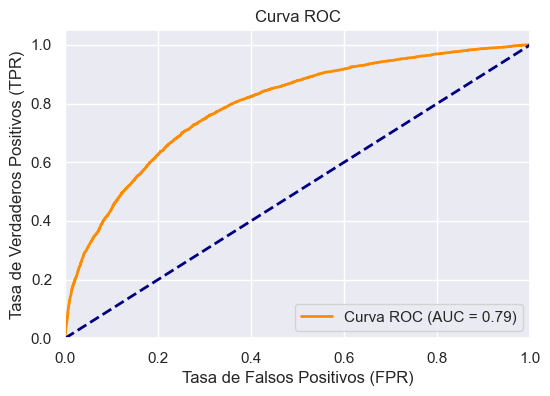

In [ ]:
x,y=obtención_de_datos(cleaned_df,['Sunshine','Humidity_Difference'],'RainTomorrow',0)
y=[1 if i=="Yes" else 0 for i in y]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Entreno un modelo (en este caso, un clasificador de regresión logística)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Obtengo las probabilidades de predicción del modelo
y_probs = model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La **AUC** (Area Under Curve) o Área bajo la Curva nos da en 0.79 lo cuál indica que el modelo tiene un buen rendimiento en la tarea de clasificación binaria.